In [23]:
import os
os.chdir("/Users/karol/Desktop/Antwerp 1st/ANN/lab/Project/")
from self_supervising_task.dataloader import train_rotation_loader, valid_rotation_loader, train_preturbation_loader, valid_preturbation_loader
from self_supervising_task.models import Rotation1, Rotation2, Preturbation1
from self_supervising_task.settings import Epochs, LR
from supervising_task.dataloader import load_15SceneData, simple_15SceneData
from helper_functions import train, plot_accuracy, plot_loss, simple_classifier, complex_classifier, plot_confusion, evaluate
from matplotlib import pyplot as plt
import numpy as np
import random
import torch
import pandas as pd
from torchvision import transforms, datasets

# Pipeline 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


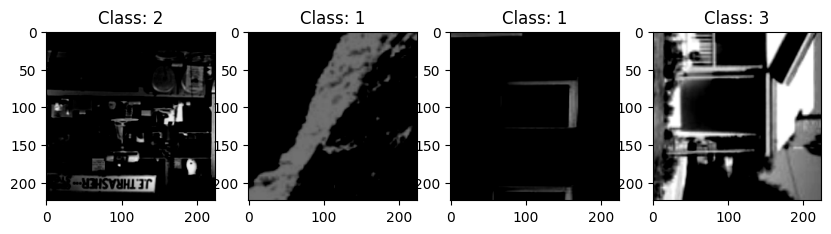

In [19]:
# Load the data
train_loader = train_rotation_loader(transform="complex")
validation_loader = valid_rotation_loader()

dataiter = iter(train_loader)
images, labels = dataiter.__next__()

# plot some images
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for i in range(4):
    ax = axes[i]
    img = np.transpose(images[i], (1, 2, 0))
    ax.imshow(img)
    ax.set_title(f"Class: {labels[i].item()}")

plt.show()

## Model 1 - Base model with shallow network

In [3]:
# creating a model
rotation1 = Rotation1()
# Print classifier architecture
print(rotation1.model.classifier)


Sequential(
  (0): Dropout(p=0.2, inplace=False)
  (1): Linear(in_features=1280, out_features=4, bias=True)
)


100%|██████████| 94/94 [00:33<00:00,  2.78it/s]


Epoch 1/30: Train Loss: 0.6904, Train Acc: 0.7167, Val Loss: 0.3155, Val Acc: 0.8945


100%|██████████| 94/94 [00:35<00:00,  2.64it/s]


Epoch 2/30: Train Loss: 0.4881, Train Acc: 0.8120, Val Loss: 0.2931, Val Acc: 0.8905


100%|██████████| 94/94 [00:33<00:00,  2.83it/s]


Epoch 3/30: Train Loss: 0.4395, Train Acc: 0.8270, Val Loss: 0.2568, Val Acc: 0.9082


100%|██████████| 94/94 [00:36<00:00,  2.60it/s]


Epoch 4/30: Train Loss: 0.4099, Train Acc: 0.8445, Val Loss: 0.1924, Val Acc: 0.9276


100%|██████████| 94/94 [00:35<00:00,  2.69it/s]


Epoch 5/30: Train Loss: 0.3845, Train Acc: 0.8513, Val Loss: 0.1935, Val Acc: 0.9313


100%|██████████| 94/94 [00:33<00:00,  2.80it/s]


Epoch 6/30: Train Loss: 0.3587, Train Acc: 0.8660, Val Loss: 0.1906, Val Acc: 0.9256


100%|██████████| 94/94 [00:35<00:00,  2.68it/s]


Epoch 7/30: Train Loss: 0.3380, Train Acc: 0.8678, Val Loss: 0.2232, Val Acc: 0.9209


100%|██████████| 94/94 [00:34<00:00,  2.70it/s]


Epoch 8/30: Train Loss: 0.3295, Train Acc: 0.8745, Val Loss: 0.1751, Val Acc: 0.9417


100%|██████████| 94/94 [00:33<00:00,  2.78it/s]


Epoch 9/30: Train Loss: 0.3147, Train Acc: 0.8848, Val Loss: 0.1773, Val Acc: 0.9327


100%|██████████| 94/94 [00:35<00:00,  2.67it/s]


Epoch 10/30: Train Loss: 0.2888, Train Acc: 0.8873, Val Loss: 0.1681, Val Acc: 0.9447


100%|██████████| 94/94 [00:34<00:00,  2.70it/s]


Epoch 11/30: Train Loss: 0.2890, Train Acc: 0.8862, Val Loss: 0.1551, Val Acc: 0.9471


100%|██████████| 94/94 [00:33<00:00,  2.78it/s]


Epoch 12/30: Train Loss: 0.2866, Train Acc: 0.8935, Val Loss: 0.1741, Val Acc: 0.9414


100%|██████████| 94/94 [00:35<00:00,  2.69it/s]


Epoch 13/30: Train Loss: 0.2719, Train Acc: 0.8980, Val Loss: 0.1516, Val Acc: 0.9518


100%|██████████| 94/94 [00:34<00:00,  2.75it/s]


Epoch 14/30: Train Loss: 0.2664, Train Acc: 0.9017, Val Loss: 0.1505, Val Acc: 0.9434


100%|██████████| 94/94 [00:26<00:00,  3.61it/s]


Epoch 15/30: Train Loss: 0.2630, Train Acc: 0.9040, Val Loss: 0.1549, Val Acc: 0.9451


100%|██████████| 94/94 [00:21<00:00,  4.32it/s]


Epoch 16/30: Train Loss: 0.2557, Train Acc: 0.9063, Val Loss: 0.1392, Val Acc: 0.9521


100%|██████████| 94/94 [00:21<00:00,  4.31it/s]


Epoch 17/30: Train Loss: 0.2489, Train Acc: 0.9092, Val Loss: 0.2111, Val Acc: 0.9343


100%|██████████| 94/94 [00:21<00:00,  4.32it/s]


Epoch 18/30: Train Loss: 0.2497, Train Acc: 0.9085, Val Loss: 0.1518, Val Acc: 0.9457


100%|██████████| 94/94 [00:21<00:00,  4.32it/s]


Epoch 19/30: Train Loss: 0.2290, Train Acc: 0.9167, Val Loss: 0.2033, Val Acc: 0.9333


100%|██████████| 94/94 [00:21<00:00,  4.32it/s]


Epoch 20/30: Train Loss: 0.2066, Train Acc: 0.9242, Val Loss: 0.1248, Val Acc: 0.9581


100%|██████████| 94/94 [00:21<00:00,  4.31it/s]


Epoch 21/30: Train Loss: 0.1765, Train Acc: 0.9318, Val Loss: 0.1257, Val Acc: 0.9598


100%|██████████| 94/94 [00:21<00:00,  4.31it/s]


Epoch 22/30: Train Loss: 0.1592, Train Acc: 0.9403, Val Loss: 0.1152, Val Acc: 0.9601


100%|██████████| 94/94 [00:21<00:00,  4.32it/s]


Epoch 23/30: Train Loss: 0.1443, Train Acc: 0.9478, Val Loss: 0.1139, Val Acc: 0.9608


100%|██████████| 94/94 [00:21<00:00,  4.32it/s]


Epoch 24/30: Train Loss: 0.1426, Train Acc: 0.9473, Val Loss: 0.1141, Val Acc: 0.9618


100%|██████████| 94/94 [00:21<00:00,  4.31it/s]


Epoch 25/30: Train Loss: 0.1459, Train Acc: 0.9453, Val Loss: 0.1118, Val Acc: 0.9648


100%|██████████| 94/94 [00:21<00:00,  4.31it/s]


Epoch 26/30: Train Loss: 0.1255, Train Acc: 0.9537, Val Loss: 0.1167, Val Acc: 0.9648


100%|██████████| 94/94 [00:21<00:00,  4.31it/s]


Epoch 27/30: Train Loss: 0.1336, Train Acc: 0.9530, Val Loss: 0.1146, Val Acc: 0.9618


100%|██████████| 94/94 [00:21<00:00,  4.31it/s]


Epoch 28/30: Train Loss: 0.1406, Train Acc: 0.9475, Val Loss: 0.1146, Val Acc: 0.9655


100%|██████████| 94/94 [00:21<00:00,  4.32it/s]


Epoch 29/30: Train Loss: 0.1210, Train Acc: 0.9543, Val Loss: 0.1247, Val Acc: 0.9631


100%|██████████| 94/94 [00:21<00:00,  4.31it/s]


Epoch 30/30: Train Loss: 0.1241, Train Acc: 0.9535, Val Loss: 0.1051, Val Acc: 0.9678


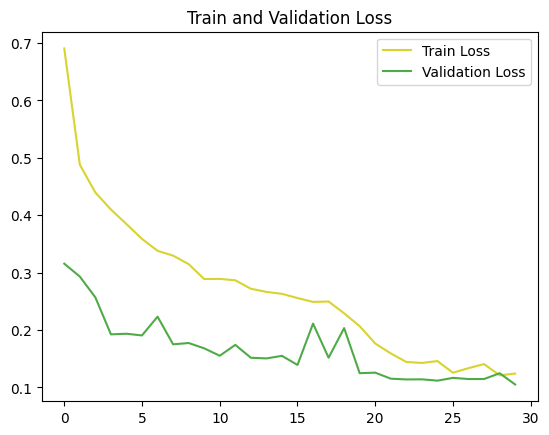

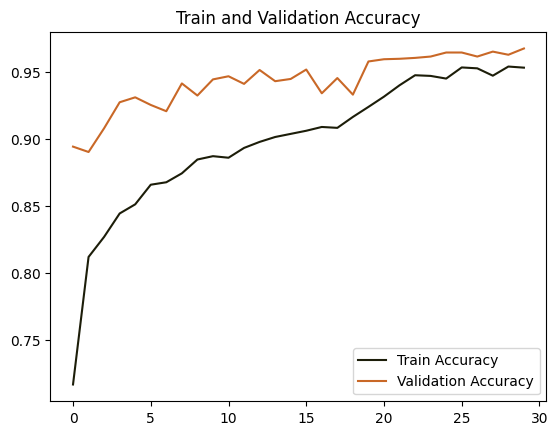

In [4]:
# setting a path
save_path = "models/rotation1.pt"

# training model
train_loss_model, train_accuracy_model, val_loss_model, val_accuracy_model  =\
    train(rotation1, train_loader, validation_loader, save_path, num_epochs=Epochs, learning_rate=LR)

# plot loss
plot_loss(train_loss_model, val_loss_model)

# plot accuracy
plot_accuracy(train_accuracy_model, val_accuracy_model)

# save accuracy results
np.savetxt("results/accuracy_rotation1.csv", 
           val_accuracy_model,
           delimiter =", ", 
           fmt ='% s')

### Confusion Matrix

100%|██████████| 94/94 [00:22<00:00,  4.19it/s]


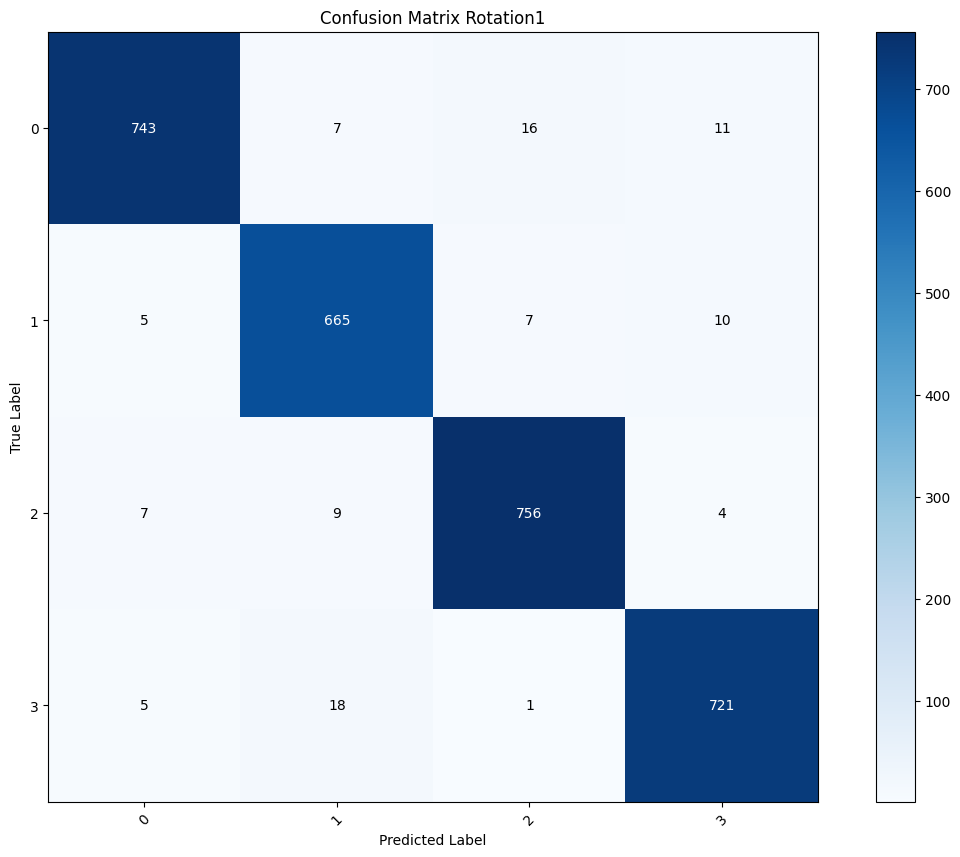

In [5]:
classes = [0, 90, 180, 270]
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

rotation1 = torch.load("models/rotation1.pt")

plot_confusion(rotation1, validation_loader,  device, classes, "Confusion Matrix Rotation1")

## Classification Part



### Model 1 (Rotation1 with simple classifier and augmanted 15sceneData)

In [7]:
# read model 
rotation1 = torch.load("models/rotation1.pt")
# freeze gradients
rotation1.model.features.requires_grad_(False)
# get new classifier sub network
classif= simple_classifier()
# set classifier
rotation1.model.classifier = classif
rotation1.model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=False)
  (1): Linear(in_features=1280, out_features=15, bias=True)
)

100%|██████████| 94/94 [00:18<00:00,  4.97it/s]


Epoch 1/50: Train Loss: 2.4858, Train Acc: 0.1913, Val Loss: 2.4553, Val Acc: 0.1698


100%|██████████| 94/94 [00:18<00:00,  5.00it/s]


Epoch 2/50: Train Loss: 2.2676, Train Acc: 0.2640, Val Loss: 2.1958, Val Acc: 0.2817


100%|██████████| 94/94 [00:18<00:00,  5.10it/s]


Epoch 3/50: Train Loss: 2.1570, Train Acc: 0.3107, Val Loss: 2.0214, Val Acc: 0.3551


100%|██████████| 94/94 [00:18<00:00,  5.08it/s]


Epoch 4/50: Train Loss: 2.1129, Train Acc: 0.3093, Val Loss: 1.9673, Val Acc: 0.3481


100%|██████████| 94/94 [00:18<00:00,  5.00it/s]


Epoch 5/50: Train Loss: 2.0234, Train Acc: 0.3333, Val Loss: 1.9165, Val Acc: 0.3876


100%|██████████| 94/94 [00:18<00:00,  5.05it/s]


Epoch 6/50: Train Loss: 2.0283, Train Acc: 0.3367, Val Loss: 1.8887, Val Acc: 0.3933


100%|██████████| 94/94 [00:18<00:00,  4.98it/s]


Epoch 7/50: Train Loss: 1.9696, Train Acc: 0.3553, Val Loss: 1.8872, Val Acc: 0.3765


100%|██████████| 94/94 [00:18<00:00,  5.04it/s]


Epoch 8/50: Train Loss: 1.9470, Train Acc: 0.3633, Val Loss: 1.8008, Val Acc: 0.4221


100%|██████████| 94/94 [00:18<00:00,  5.00it/s]


Epoch 9/50: Train Loss: 1.9455, Train Acc: 0.3680, Val Loss: 1.7345, Val Acc: 0.4415


100%|██████████| 94/94 [00:18<00:00,  5.08it/s]


Epoch 10/50: Train Loss: 1.8905, Train Acc: 0.3793, Val Loss: 1.8079, Val Acc: 0.4157


100%|██████████| 94/94 [00:18<00:00,  5.15it/s]


Epoch 11/50: Train Loss: 1.9040, Train Acc: 0.3787, Val Loss: 1.7165, Val Acc: 0.4342


100%|██████████| 94/94 [00:18<00:00,  5.09it/s]


Epoch 12/50: Train Loss: 1.9000, Train Acc: 0.3687, Val Loss: 1.7092, Val Acc: 0.4576


100%|██████████| 94/94 [00:19<00:00,  4.94it/s]


Epoch 13/50: Train Loss: 1.8656, Train Acc: 0.3860, Val Loss: 1.6737, Val Acc: 0.4606


100%|██████████| 94/94 [00:18<00:00,  4.99it/s]


Epoch 14/50: Train Loss: 1.8295, Train Acc: 0.4140, Val Loss: 1.6685, Val Acc: 0.4630


100%|██████████| 94/94 [00:19<00:00,  4.94it/s]


Epoch 15/50: Train Loss: 1.8089, Train Acc: 0.4140, Val Loss: 1.6678, Val Acc: 0.4620


100%|██████████| 94/94 [00:18<00:00,  5.02it/s]


Epoch 16/50: Train Loss: 1.8319, Train Acc: 0.3953, Val Loss: 1.7031, Val Acc: 0.4462


100%|██████████| 94/94 [00:18<00:00,  5.10it/s]


Epoch 17/50: Train Loss: 1.8172, Train Acc: 0.4107, Val Loss: 1.6113, Val Acc: 0.4760


100%|██████████| 94/94 [00:18<00:00,  5.15it/s]


Epoch 18/50: Train Loss: 1.8100, Train Acc: 0.4053, Val Loss: 1.6495, Val Acc: 0.4526


100%|██████████| 94/94 [00:19<00:00,  4.94it/s]


Epoch 19/50: Train Loss: 1.8182, Train Acc: 0.4133, Val Loss: 1.6731, Val Acc: 0.4503


100%|██████████| 94/94 [00:18<00:00,  5.16it/s]


Epoch 20/50: Train Loss: 1.7786, Train Acc: 0.4260, Val Loss: 1.5968, Val Acc: 0.4838


100%|██████████| 94/94 [00:18<00:00,  5.15it/s]


Epoch 21/50: Train Loss: 1.7932, Train Acc: 0.4073, Val Loss: 1.5852, Val Acc: 0.4730


100%|██████████| 94/94 [00:18<00:00,  5.07it/s]


Epoch 22/50: Train Loss: 1.7771, Train Acc: 0.4260, Val Loss: 1.5596, Val Acc: 0.4948


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 23/50: Train Loss: 1.7707, Train Acc: 0.4100, Val Loss: 1.5746, Val Acc: 0.4838


100%|██████████| 94/94 [00:18<00:00,  5.03it/s]


Epoch 24/50: Train Loss: 1.7516, Train Acc: 0.4287, Val Loss: 1.5734, Val Acc: 0.4844


100%|██████████| 94/94 [00:18<00:00,  5.00it/s]


Epoch 25/50: Train Loss: 1.7611, Train Acc: 0.4120, Val Loss: 1.5640, Val Acc: 0.4918


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 26/50: Train Loss: 1.7410, Train Acc: 0.4353, Val Loss: 1.5248, Val Acc: 0.5025


100%|██████████| 94/94 [00:18<00:00,  5.07it/s]


Epoch 27/50: Train Loss: 1.7473, Train Acc: 0.4360, Val Loss: 1.4951, Val Acc: 0.5183


100%|██████████| 94/94 [00:18<00:00,  5.01it/s]


Epoch 28/50: Train Loss: 1.7286, Train Acc: 0.4493, Val Loss: 1.5411, Val Acc: 0.4961


100%|██████████| 94/94 [00:19<00:00,  4.94it/s]


Epoch 29/50: Train Loss: 1.7209, Train Acc: 0.4367, Val Loss: 1.5406, Val Acc: 0.5005


100%|██████████| 94/94 [00:18<00:00,  5.04it/s]


Epoch 30/50: Train Loss: 1.7520, Train Acc: 0.4207, Val Loss: 1.5059, Val Acc: 0.5116


100%|██████████| 94/94 [00:18<00:00,  5.13it/s]


Epoch 31/50: Train Loss: 1.6915, Train Acc: 0.4420, Val Loss: 1.5145, Val Acc: 0.5095


100%|██████████| 94/94 [00:18<00:00,  5.15it/s]


Epoch 32/50: Train Loss: 1.7012, Train Acc: 0.4480, Val Loss: 1.4976, Val Acc: 0.5152


100%|██████████| 94/94 [00:18<00:00,  5.15it/s]


Epoch 33/50: Train Loss: 1.7185, Train Acc: 0.4473, Val Loss: 1.5315, Val Acc: 0.5025


100%|██████████| 94/94 [00:18<00:00,  5.14it/s]


Epoch 34/50: Train Loss: 1.7299, Train Acc: 0.4340, Val Loss: 1.5210, Val Acc: 0.5065


100%|██████████| 94/94 [00:18<00:00,  5.12it/s]


Epoch 35/50: Train Loss: 1.7088, Train Acc: 0.4380, Val Loss: 1.5249, Val Acc: 0.5002


100%|██████████| 94/94 [00:18<00:00,  5.12it/s]


Epoch 36/50: Train Loss: 1.7062, Train Acc: 0.4327, Val Loss: 1.5150, Val Acc: 0.5082


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]

Epoch 37/50: Train Loss: 1.7496, Train Acc: 0.4220, Val Loss: 1.5137, Val Acc: 0.5102
Validation accuracy did not improve for 10 epochs. Stopping training...


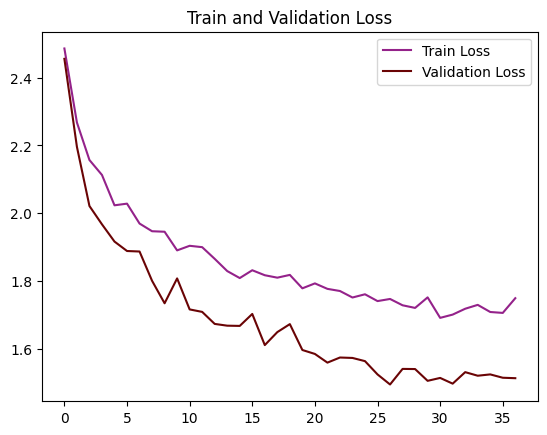

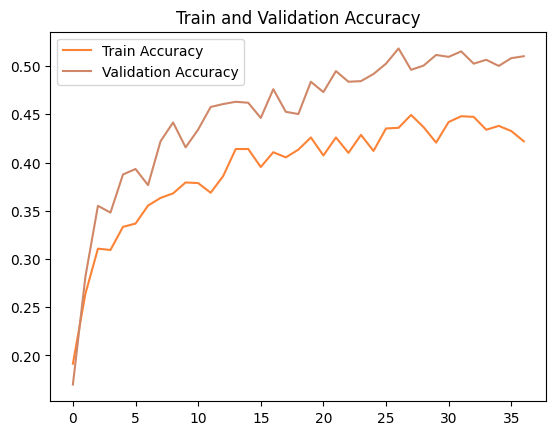

In [13]:
# read model 
rotation1 = torch.load("models/rotation1.pt")
# freeze gradients
rotation1.model.features.requires_grad_(False)
# get new classifier sub network
classif= simple_classifier()
# set classifier
rotation1.model.classifier = classif
# load original data
train_loader, validation_loader = load_15SceneData()
# save path
save_path = "models/rotation1_classifier.pt"
# train 
train_loss_list, train_accuracy_list, val_loss_list, val_accuracy_list  =\
    train(rotation1, train_loader, validation_loader, save_path, num_epochs=50, learning_rate=LR, early_stopping_patience=10)

# plot loss
plot_loss(train_loss_list, val_loss_list)

# plot accuracy
plot_accuracy(train_accuracy_list, val_accuracy_list)

# save accuracy results
np.savetxt("results/accuracy_rotation1_classifier.csv", 
           val_accuracy_list,
           delimiter =", ", 
           fmt ='% s')

### Model 2 (Rotation1 with complex classifier and augmanted 15sceneData)

Epoch 1/50: Train Loss: 2.5074, Train Acc: 0.1747, Val Loss: 2.3307, Val Acc: 0.2248
Epoch 2/50: Train Loss: 2.1994, Train Acc: 0.2707, Val Loss: 2.0888, Val Acc: 0.3069
Epoch 3/50: Train Loss: 2.0745, Train Acc: 0.2833, Val Loss: 1.8672, Val Acc: 0.3782
Epoch 4/50: Train Loss: 2.0493, Train Acc: 0.3033, Val Loss: 1.7663, Val Acc: 0.4127
Epoch 5/50: Train Loss: 1.9595, Train Acc: 0.3253, Val Loss: 1.7176, Val Acc: 0.4117
Epoch 6/50: Train Loss: 1.9157, Train Acc: 0.3447, Val Loss: 1.6014, Val Acc: 0.4452
Epoch 7/50: Train Loss: 1.8559, Train Acc: 0.3527, Val Loss: 1.6694, Val Acc: 0.4037
Epoch 8/50: Train Loss: 1.8858, Train Acc: 0.3640, Val Loss: 1.7540, Val Acc: 0.4127
Epoch 9/50: Train Loss: 1.8510, Train Acc: 0.3727, Val Loss: 2.0398, Val Acc: 0.3668
Epoch 10/50: Train Loss: 1.7917, Train Acc: 0.3833, Val Loss: 1.5043, Val Acc: 0.4781
Epoch 11/50: Train Loss: 1.7277, Train Acc: 0.4047, Val Loss: 1.4708, Val Acc: 0.4918
Epoch 12/50: Train Loss: 1.7274, Train Acc: 0.4027, Val Loss: 1

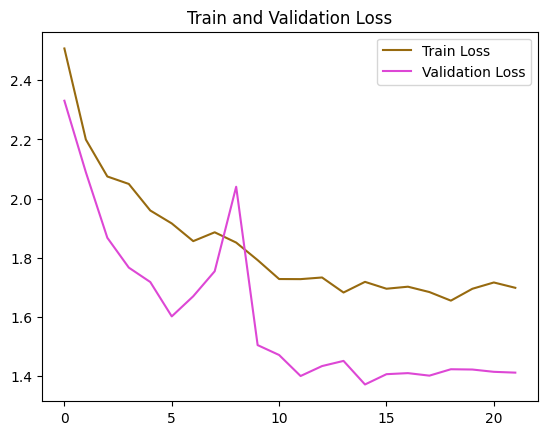

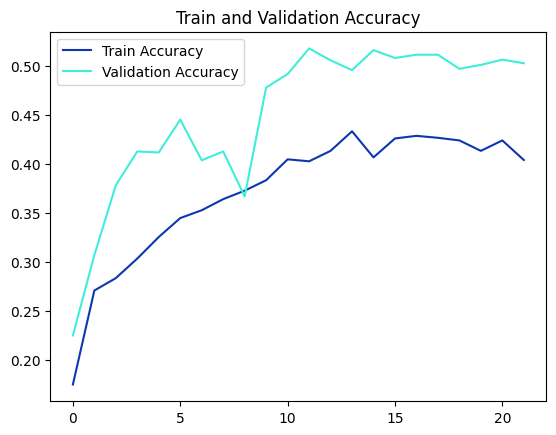

In [18]:
# read model 
rotation1 = torch.load("models/rotation1.pt")
# freeze gradients
rotation1.model.features.requires_grad_(False)
# get new classifier sub network
classif = complex_classifier()
# load original data
train_loader, validation_loader = load_15SceneData()
# set classifier
rotation1.model.classifier = classif
# save path
save_path = "models/rotation2_classifier.pt"
# train 
train_loss_list2, train_accuracy_list2, val_loss_list2, val_accuracy_list2  =\
    train(rotation1, train_loader, validation_loader, save_path, num_epochs=50, 
            learning_rate=LR, early_stopping_patience=10)

# plot loss
plot_loss(train_loss_list2, val_loss_list2)

# plot accuracy
plot_accuracy(train_accuracy_list2, val_accuracy_list2)

# save accuracy results
np.savetxt("results/accuracy_rotation2_classifier.csv", 
           val_accuracy_list2,
           delimiter =", ", 
           fmt ='% s')

### Comparison Model 1 and Model 2

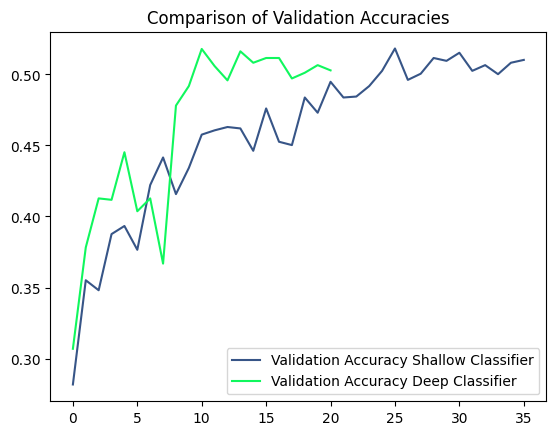

In [28]:
val_accuracy_model1 = np.array(pd.read_csv("results/accuracy_rotation1_classifier.csv"))
val_accuracy_model2 = np.array(pd.read_csv("results/accuracy_rotation2_classifier.csv"))

color = (np.random.random(),np.random.random(),np.random.random())
plt.plot(np.arange(len(val_accuracy_model1)), val_accuracy_model1, color=color, label='Validation Accuracy Shallow Classifier')

color = (np.random.random(),np.random.random(),np.random.random())
plt.plot(np.arange(len(val_accuracy_model2)), val_accuracy_model2,color=color,label='Validation Accuracy Deep Classifier')

plt.legend()
plt.title('Comparison of Validation Accuracies')
plt.show()

### Model 3 (Rotation1 with simple 15sceneData and simple classifier)

100%|██████████| 94/94 [00:18<00:00,  5.08it/s]


Epoch 1/50: Train Loss: 2.3326, Train Acc: 0.2720, Val Loss: 2.0149, Val Acc: 0.4204


100%|██████████| 94/94 [00:18<00:00,  5.05it/s]


Epoch 2/50: Train Loss: 1.9203, Train Acc: 0.4173, Val Loss: 1.7940, Val Acc: 0.4714


100%|██████████| 94/94 [00:18<00:00,  5.03it/s]


Epoch 3/50: Train Loss: 1.7462, Train Acc: 0.4460, Val Loss: 1.6827, Val Acc: 0.4871


100%|██████████| 94/94 [00:18<00:00,  5.02it/s]


Epoch 4/50: Train Loss: 1.6065, Train Acc: 0.5067, Val Loss: 1.5990, Val Acc: 0.5169


100%|██████████| 94/94 [00:18<00:00,  5.00it/s]


Epoch 5/50: Train Loss: 1.5215, Train Acc: 0.5307, Val Loss: 1.5195, Val Acc: 0.5427


100%|██████████| 94/94 [00:18<00:00,  5.01it/s]


Epoch 6/50: Train Loss: 1.4794, Train Acc: 0.5560, Val Loss: 1.4716, Val Acc: 0.5487


100%|██████████| 94/94 [00:18<00:00,  5.04it/s]


Epoch 7/50: Train Loss: 1.4281, Train Acc: 0.5613, Val Loss: 1.4411, Val Acc: 0.5457


100%|██████████| 94/94 [00:18<00:00,  5.05it/s]


Epoch 8/50: Train Loss: 1.3598, Train Acc: 0.5860, Val Loss: 1.4006, Val Acc: 0.5561


100%|██████████| 94/94 [00:18<00:00,  5.05it/s]


Epoch 9/50: Train Loss: 1.3326, Train Acc: 0.5887, Val Loss: 1.3863, Val Acc: 0.5709


100%|██████████| 94/94 [00:18<00:00,  5.06it/s]


Epoch 10/50: Train Loss: 1.3375, Train Acc: 0.5853, Val Loss: 1.3404, Val Acc: 0.5849


100%|██████████| 94/94 [00:18<00:00,  5.07it/s]


Epoch 11/50: Train Loss: 1.2617, Train Acc: 0.6033, Val Loss: 1.3258, Val Acc: 0.5816


100%|██████████| 94/94 [00:18<00:00,  5.06it/s]


Epoch 12/50: Train Loss: 1.2457, Train Acc: 0.6060, Val Loss: 1.3067, Val Acc: 0.5859


100%|██████████| 94/94 [00:18<00:00,  5.06it/s]


Epoch 13/50: Train Loss: 1.2340, Train Acc: 0.6080, Val Loss: 1.3105, Val Acc: 0.5776


100%|██████████| 94/94 [00:18<00:00,  5.06it/s]


Epoch 14/50: Train Loss: 1.2090, Train Acc: 0.6213, Val Loss: 1.3056, Val Acc: 0.5796


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 15/50: Train Loss: 1.1698, Train Acc: 0.6227, Val Loss: 1.2654, Val Acc: 0.5997


100%|██████████| 94/94 [00:18<00:00,  5.10it/s]


Epoch 16/50: Train Loss: 1.1343, Train Acc: 0.6460, Val Loss: 1.2548, Val Acc: 0.6010


100%|██████████| 94/94 [00:18<00:00,  5.08it/s]


Epoch 17/50: Train Loss: 1.1417, Train Acc: 0.6347, Val Loss: 1.2467, Val Acc: 0.6030


100%|██████████| 94/94 [00:18<00:00,  5.06it/s]


Epoch 18/50: Train Loss: 1.1266, Train Acc: 0.6380, Val Loss: 1.2475, Val Acc: 0.5997


100%|██████████| 94/94 [00:18<00:00,  5.06it/s]


Epoch 19/50: Train Loss: 1.1166, Train Acc: 0.6527, Val Loss: 1.2374, Val Acc: 0.5983


100%|██████████| 94/94 [00:18<00:00,  5.10it/s]


Epoch 20/50: Train Loss: 1.1297, Train Acc: 0.6353, Val Loss: 1.2101, Val Acc: 0.6137


100%|██████████| 94/94 [00:18<00:00,  5.05it/s]


Epoch 21/50: Train Loss: 1.1005, Train Acc: 0.6447, Val Loss: 1.1935, Val Acc: 0.6214


100%|██████████| 94/94 [00:18<00:00,  5.07it/s]


Epoch 22/50: Train Loss: 1.0881, Train Acc: 0.6500, Val Loss: 1.1938, Val Acc: 0.6191


100%|██████████| 94/94 [00:18<00:00,  5.01it/s]


Epoch 23/50: Train Loss: 1.0547, Train Acc: 0.6540, Val Loss: 1.2042, Val Acc: 0.6131


100%|██████████| 94/94 [00:18<00:00,  4.96it/s]


Epoch 24/50: Train Loss: 1.0477, Train Acc: 0.6547, Val Loss: 1.1898, Val Acc: 0.6168


100%|██████████| 94/94 [00:18<00:00,  5.06it/s]


Epoch 25/50: Train Loss: 1.0318, Train Acc: 0.6693, Val Loss: 1.1817, Val Acc: 0.6211


100%|██████████| 94/94 [00:18<00:00,  5.09it/s]


Epoch 26/50: Train Loss: 1.0344, Train Acc: 0.6693, Val Loss: 1.1799, Val Acc: 0.6201


100%|██████████| 94/94 [00:18<00:00,  5.05it/s]


Epoch 27/50: Train Loss: 1.0059, Train Acc: 0.6960, Val Loss: 1.1791, Val Acc: 0.6221


100%|██████████| 94/94 [00:18<00:00,  5.06it/s]


Epoch 28/50: Train Loss: 1.0445, Train Acc: 0.6607, Val Loss: 1.1848, Val Acc: 0.6171


100%|██████████| 94/94 [00:18<00:00,  5.05it/s]


Epoch 29/50: Train Loss: 1.0174, Train Acc: 0.6787, Val Loss: 1.1862, Val Acc: 0.6204


100%|██████████| 94/94 [00:18<00:00,  5.06it/s]


Epoch 30/50: Train Loss: 1.0042, Train Acc: 0.6773, Val Loss: 1.1801, Val Acc: 0.6251


100%|██████████| 94/94 [00:18<00:00,  5.05it/s]


Epoch 31/50: Train Loss: 1.0148, Train Acc: 0.6907, Val Loss: 1.1717, Val Acc: 0.6298


100%|██████████| 94/94 [00:18<00:00,  5.05it/s]


Epoch 32/50: Train Loss: 1.0219, Train Acc: 0.6680, Val Loss: 1.1738, Val Acc: 0.6288


100%|██████████| 94/94 [00:18<00:00,  5.03it/s]


Epoch 33/50: Train Loss: 0.9947, Train Acc: 0.6813, Val Loss: 1.1732, Val Acc: 0.6275


100%|██████████| 94/94 [00:18<00:00,  5.06it/s]


Epoch 34/50: Train Loss: 0.9910, Train Acc: 0.6853, Val Loss: 1.1774, Val Acc: 0.6261


100%|██████████| 94/94 [00:18<00:00,  5.05it/s]


Epoch 35/50: Train Loss: 1.0095, Train Acc: 0.6833, Val Loss: 1.1763, Val Acc: 0.6248


100%|██████████| 94/94 [00:18<00:00,  5.09it/s]


Epoch 36/50: Train Loss: 1.0141, Train Acc: 0.6753, Val Loss: 1.1700, Val Acc: 0.6238


100%|██████████| 94/94 [00:18<00:00,  5.04it/s]


Epoch 37/50: Train Loss: 1.0195, Train Acc: 0.6780, Val Loss: 1.1805, Val Acc: 0.6178


100%|██████████| 94/94 [00:18<00:00,  5.07it/s]


Epoch 38/50: Train Loss: 1.0031, Train Acc: 0.6887, Val Loss: 1.1780, Val Acc: 0.6248


100%|██████████| 94/94 [00:18<00:00,  5.04it/s]


Epoch 39/50: Train Loss: 1.0103, Train Acc: 0.6807, Val Loss: 1.1801, Val Acc: 0.6221


100%|██████████| 94/94 [00:18<00:00,  5.00it/s]


Epoch 40/50: Train Loss: 0.9932, Train Acc: 0.6880, Val Loss: 1.1787, Val Acc: 0.6204


100%|██████████| 94/94 [00:18<00:00,  5.09it/s]

Epoch 41/50: Train Loss: 1.0121, Train Acc: 0.6833, Val Loss: 1.1745, Val Acc: 0.6211
Validation accuracy did not improve for 10 epochs. Stopping training...


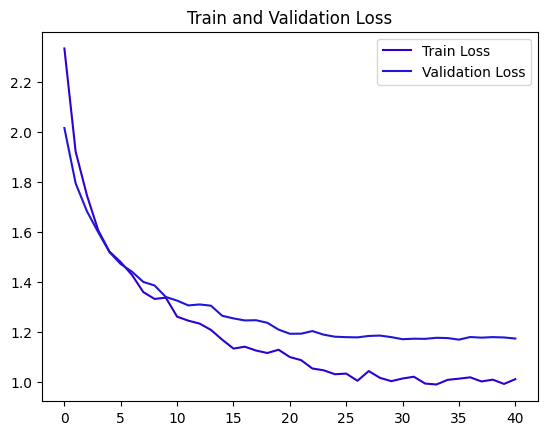

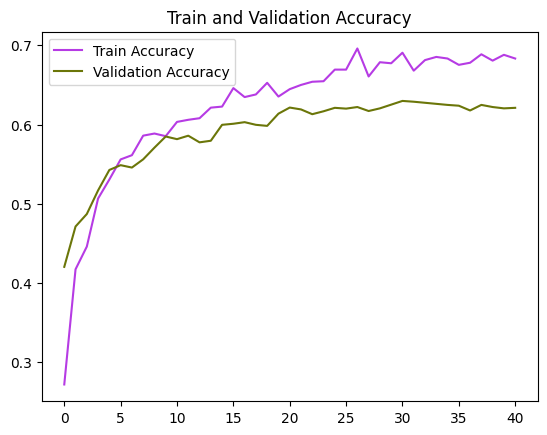

In [13]:
# read model 
rotation1 = torch.load("models/rotation1.pt")
# freeze gradients
rotation1.model.features.requires_grad_(False)
# get new classifier sub network
classif = simple_classifier()
# load original data
train_loader, validation_loader = simple_15SceneData()
# set classifier
rotation1.model.classifier = classif
# save path
save_path = "models/rotation3_classifier.pt"
# train 
train_loss_list3, train_accuracy_list3, val_loss_list3, val_accuracy_list3 =\
    train(rotation1, train_loader, validation_loader, save_path, num_epochs=50, 
            learning_rate=LR, early_stopping_patience=10)

# plot loss
plot_loss(train_loss_list3, val_loss_list3)

# plot accuracy
plot_accuracy(train_accuracy_list3, val_accuracy_list3)

# save accuracy results
np.savetxt("results/accuracy_rotation3_classifier.csv", 
           val_accuracy_list3,
           delimiter =", ", 
           fmt ='% s')

### Comparison

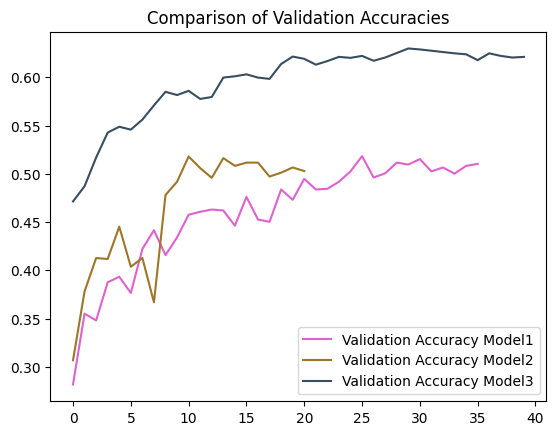

In [21]:
val_accuracy_model1 = np.array(pd.read_csv("results/accuracy_rotation1_classifier.csv"))
val_accuracy_model2 = np.array(pd.read_csv("results/accuracy_rotation2_classifier.csv"))
val_accuracy_model3 = np.array(pd.read_csv("results/accuracy_rotation3_classifier.csv"))

color = (np.random.random(),np.random.random(),np.random.random())
plt.plot(np.arange(len(val_accuracy_model1)), val_accuracy_model1, color=color, label='Validation Accuracy Model1')

color = (np.random.random(),np.random.random(),np.random.random())
plt.plot(np.arange(len(val_accuracy_model2)), val_accuracy_model2,color=color,label='Validation Accuracy Model2')

color = (np.random.random(),np.random.random(),np.random.random())
plt.plot(np.arange(len(val_accuracy_model3)), val_accuracy_model3,color=color,label='Validation Accuracy Model3')

plt.legend()
plt.title('Comparison of Validation Accuracies')
plt.show()

### Confusion matrices

100%|██████████| 94/94 [00:19<00:00,  4.84it/s]


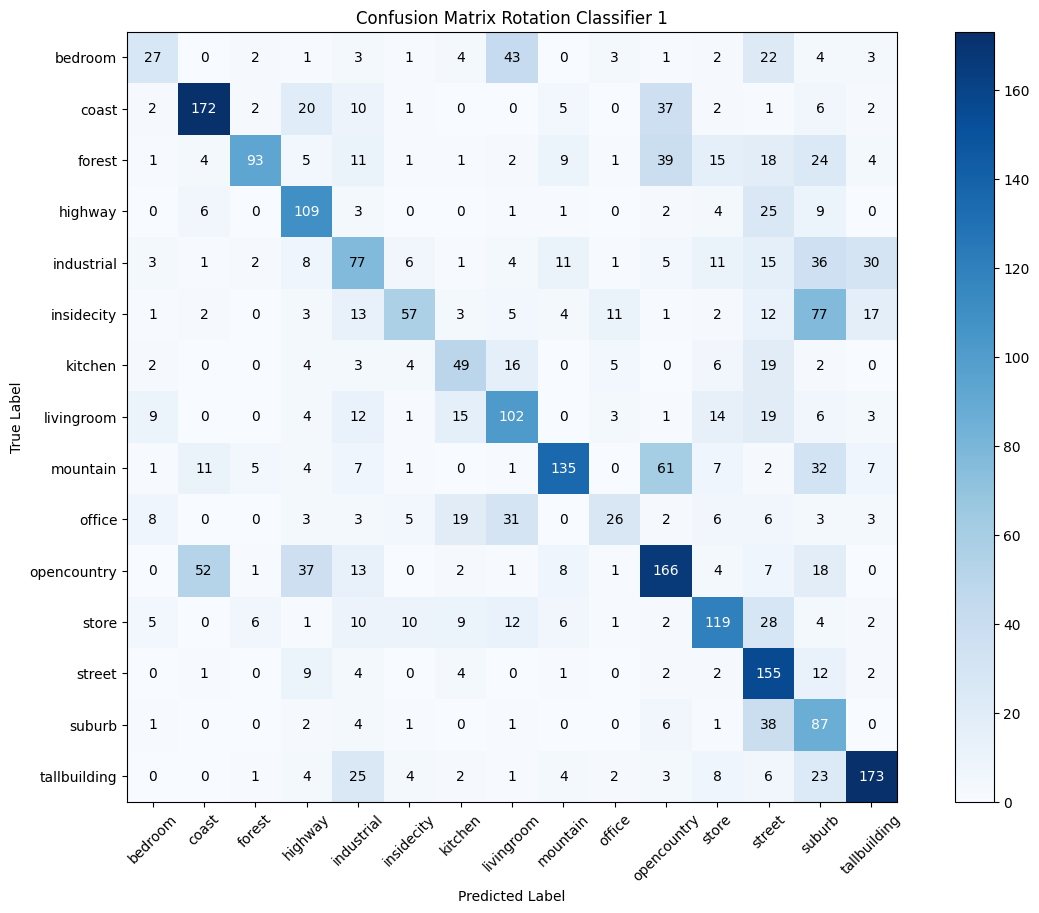

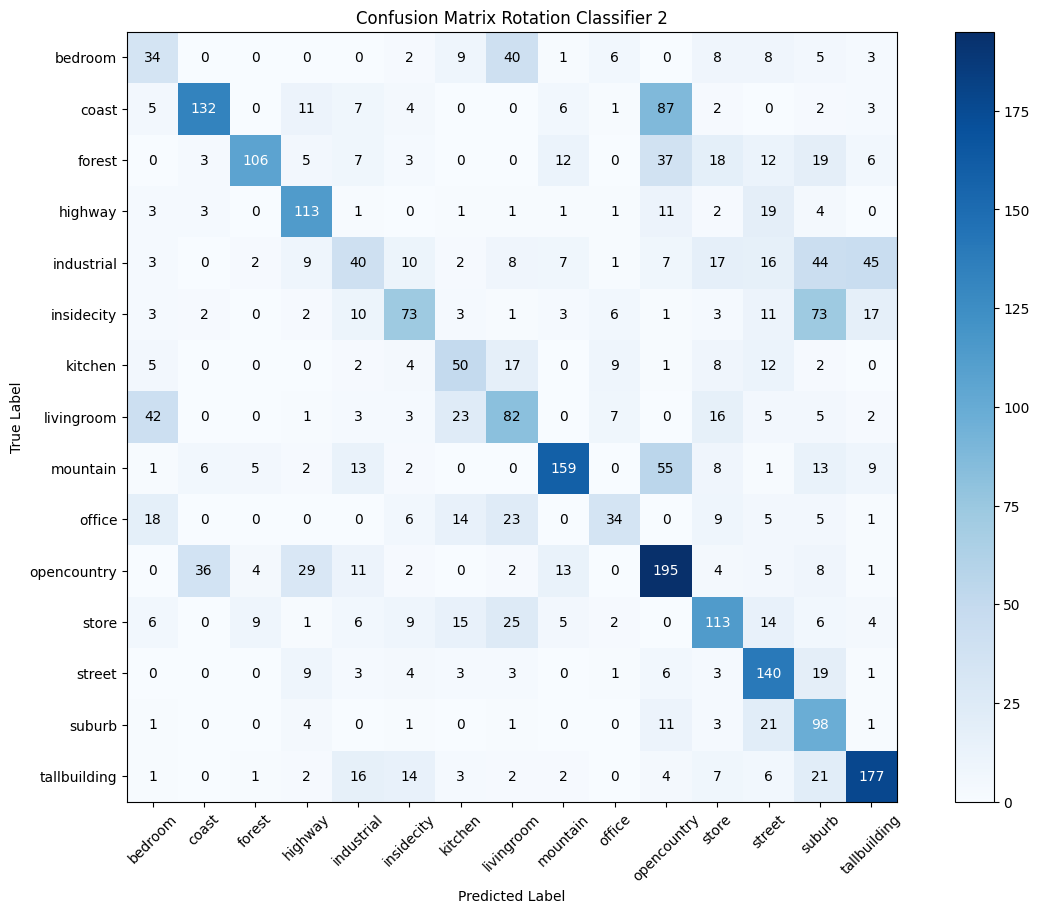

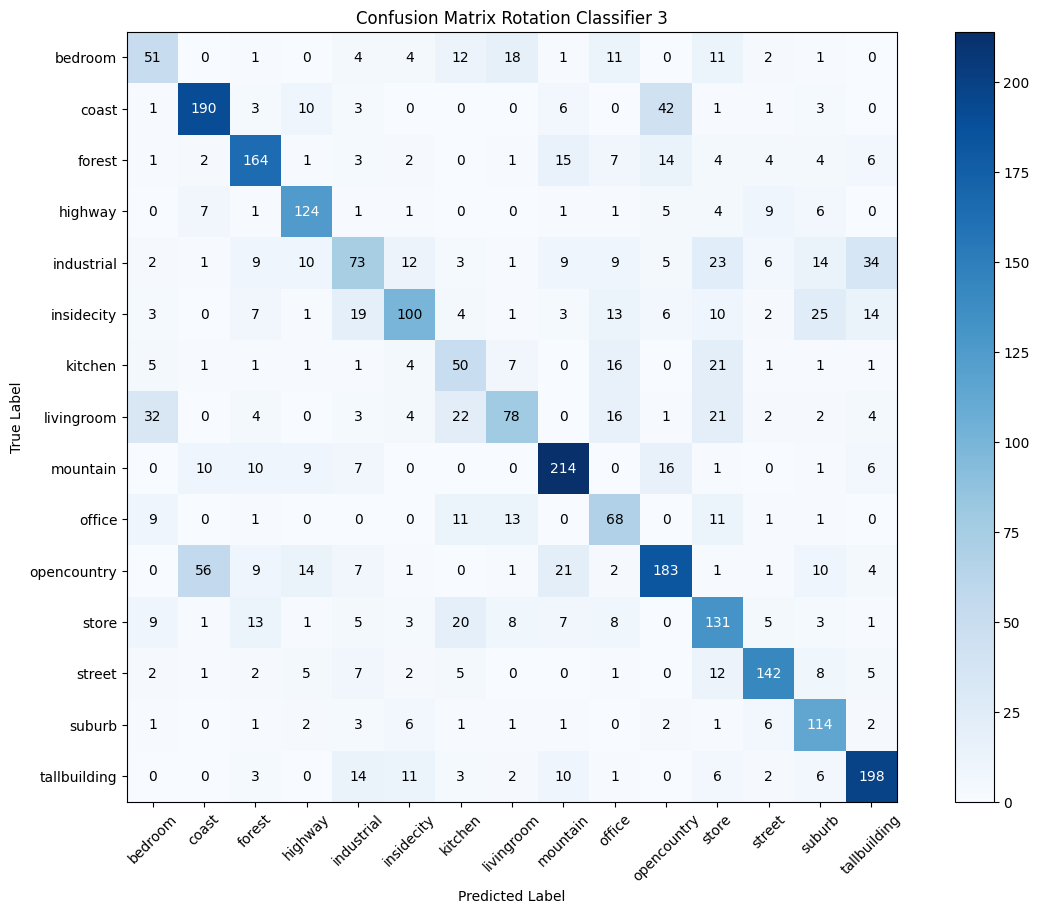

In [24]:
trainset = datasets.ImageFolder('data/train', transform=transforms.ToTensor())
classes = trainset.classes

train_loader, validation_loader = load_15SceneData()
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

model1 = torch.load("models/rotation1_classifier.pt")
model1.to(device)

model2 = torch.load("models/rotation2_classifier.pt")
model2.to(device)

model3 = torch.load("models/rotation3_classifier.pt")
model3.to(device)

plot_confusion(model1, validation_loader, device, speaker_labels=classes, title="Confusion Matrix Rotation Classifier 1")
plot_confusion(model2, validation_loader, device, speaker_labels=classes, title="Confusion Matrix Rotation Classifier 2")
plot_confusion(model3, validation_loader, device, speaker_labels=classes, title="Confusion Matrix Rotation Classifier 3")

# Pipeline 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


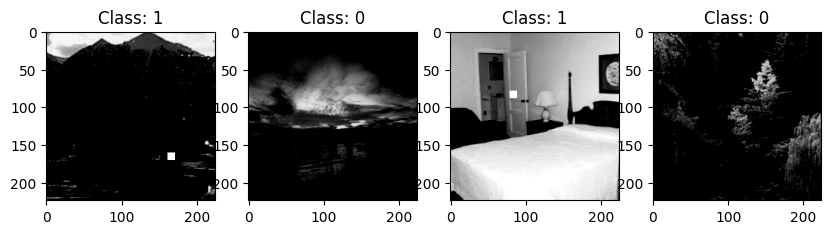

In [14]:
# Load the data
train_loader = train_preturbation_loader(transform="simple")
validation_loader = valid_preturbation_loader()

dataiter = iter(train_loader)
images, labels = dataiter.__next__()

# plot some images
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for i in range(4):
    ax = axes[i]
    img = np.transpose(images[i], (1, 2, 0))
    ax.imshow(img)
    ax.set_title(f"Class: {labels[i].item()}")

plt.show()

## Model 1

In [3]:
# creating a model
preturbation1 = Preturbation1()
# Print classifier architecture
print(preturbation1.model.classifier)

Sequential(
  (0): Dropout(p=0.2, inplace=False)
  (1): Linear(in_features=1280, out_features=2, bias=True)
)


100%|██████████| 94/94 [00:18<00:00,  4.95it/s]


Epoch 1/30: Train Loss: 0.0267, Train Acc: 0.9907, Val Loss: 0.0001, Val Acc: 1.0000


100%|██████████| 94/94 [00:18<00:00,  5.05it/s]


Epoch 2/30: Train Loss: 0.0001, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000


100%|██████████| 94/94 [00:18<00:00,  5.09it/s]


Epoch 3/30: Train Loss: 0.0000, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000


100%|██████████| 94/94 [00:18<00:00,  5.09it/s]


Epoch 4/30: Train Loss: 0.0000, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000


100%|██████████| 94/94 [00:18<00:00,  5.08it/s]


Epoch 5/30: Train Loss: 0.0000, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000


100%|██████████| 94/94 [00:18<00:00,  5.10it/s]


Epoch 6/30: Train Loss: 0.0000, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000


100%|██████████| 94/94 [00:18<00:00,  5.06it/s]


Epoch 7/30: Train Loss: 0.0000, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000


100%|██████████| 94/94 [00:18<00:00,  5.12it/s]


Epoch 8/30: Train Loss: 0.0000, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000


100%|██████████| 94/94 [00:18<00:00,  5.13it/s]


Epoch 9/30: Train Loss: 0.0000, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000


100%|██████████| 94/94 [00:18<00:00,  5.12it/s]


Epoch 10/30: Train Loss: 0.0000, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000


100%|██████████| 94/94 [00:18<00:00,  5.13it/s]


Epoch 11/30: Train Loss: 0.0000, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 12/30: Train Loss: 0.0000, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000


100%|██████████| 94/94 [00:18<00:00,  5.06it/s]


Epoch 13/30: Train Loss: 0.0000, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000


100%|██████████| 94/94 [00:18<00:00,  4.99it/s]


Epoch 14/30: Train Loss: 0.0000, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000


100%|██████████| 94/94 [00:18<00:00,  5.07it/s]


Epoch 15/30: Train Loss: 0.0000, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000


100%|██████████| 94/94 [00:18<00:00,  5.10it/s]


Epoch 16/30: Train Loss: 0.0000, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000


100%|██████████| 94/94 [00:18<00:00,  5.07it/s]


Epoch 17/30: Train Loss: 0.0001, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000


100%|██████████| 94/94 [00:18<00:00,  5.03it/s]


Epoch 18/30: Train Loss: 0.0000, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000


100%|██████████| 94/94 [00:18<00:00,  5.07it/s]


Epoch 19/30: Train Loss: 0.0000, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000


100%|██████████| 94/94 [00:18<00:00,  5.03it/s]


Epoch 20/30: Train Loss: 0.0000, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000


100%|██████████| 94/94 [00:18<00:00,  5.07it/s]


Epoch 21/30: Train Loss: 0.0000, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000


100%|██████████| 94/94 [00:18<00:00,  5.07it/s]


Epoch 22/30: Train Loss: 0.0000, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000


100%|██████████| 94/94 [00:18<00:00,  5.03it/s]


Epoch 23/30: Train Loss: 0.0000, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000


100%|██████████| 94/94 [00:18<00:00,  5.12it/s]


Epoch 24/30: Train Loss: 0.0000, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 25/30: Train Loss: 0.0000, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000


100%|██████████| 94/94 [00:18<00:00,  5.10it/s]


Epoch 26/30: Train Loss: 0.0000, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000


100%|██████████| 94/94 [00:18<00:00,  5.10it/s]


Epoch 27/30: Train Loss: 0.0000, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000


100%|██████████| 94/94 [00:18<00:00,  5.16it/s]


Epoch 28/30: Train Loss: 0.0000, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000


100%|██████████| 94/94 [00:18<00:00,  5.05it/s]


Epoch 29/30: Train Loss: 0.0000, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000


100%|██████████| 94/94 [00:18<00:00,  5.05it/s]


Epoch 30/30: Train Loss: 0.0000, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000


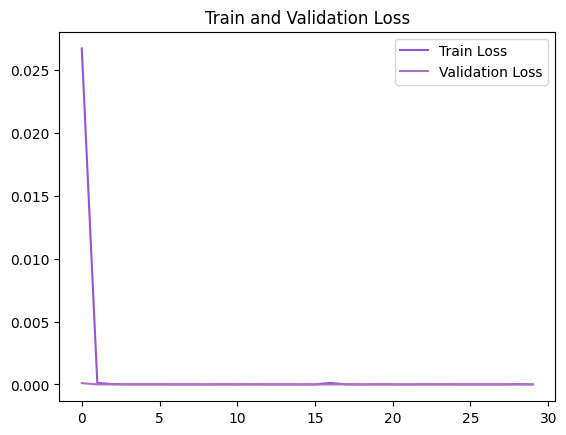

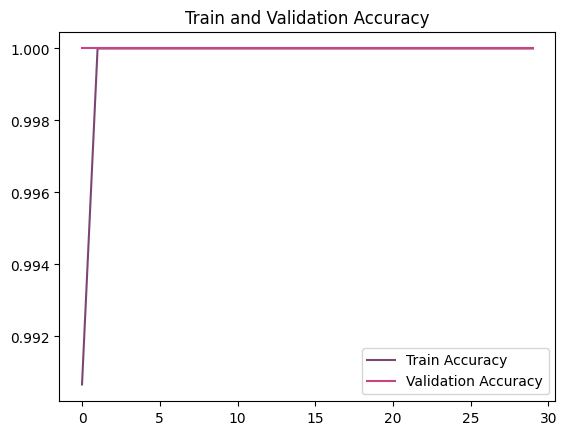

In [4]:
# setting a path
save_path = "models/preturbation1.pt"

# training model
train_loss_model, train_accuracy_model, val_loss_model, val_accuracy_model  =\
    train(preturbation1, train_loader, validation_loader, save_path, num_epochs=Epochs, learning_rate=LR, early_stopping_patience=10)

# plot loss
plot_loss(train_loss_model, val_loss_model)

# plot accuracy
plot_accuracy(train_accuracy_model, val_accuracy_model)

# save accuracy results
np.savetxt("results/accuracy_preturbation1.csv", 
           val_accuracy_model,
           delimiter =", ", 
           fmt ='% s')

### Confusion Matrix

100%|██████████| 94/94 [00:19<00:00,  4.79it/s]


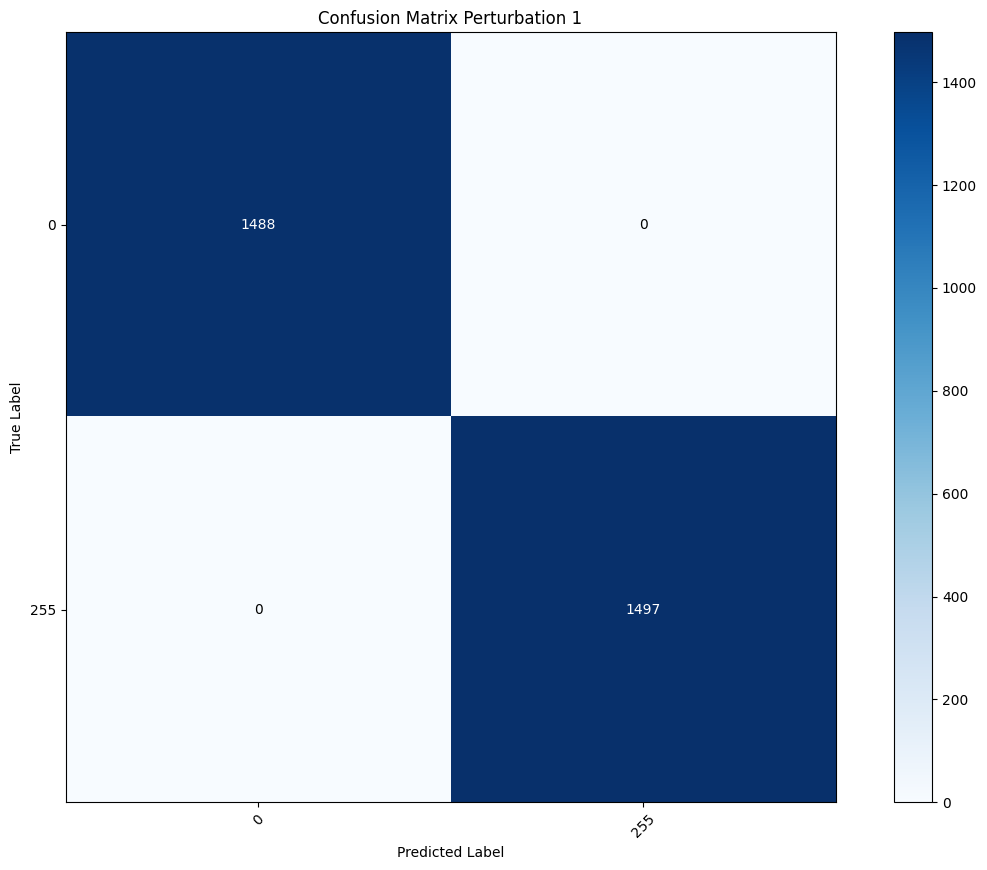

In [27]:
classes = [0, 255]
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
validation_loader = valid_preturbation_loader()
preturbation1 = torch.load("models/preturbation1.pt")

plot_confusion(preturbation1, validation_loader,  device, classes, "Confusion Matrix Perturbation 1")

## Classification Problem

### Model 1 (Preturbation1 with simple classifier and augmented data)

100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 1/50: Train Loss: 2.6526, Train Acc: 0.1293, Val Loss: 2.3111, Val Acc: 0.2385


100%|██████████| 94/94 [00:18<00:00,  5.10it/s]


Epoch 2/50: Train Loss: 2.4552, Train Acc: 0.2113, Val Loss: 1.8032, Val Acc: 0.4489


100%|██████████| 94/94 [00:18<00:00,  5.12it/s]


Epoch 3/50: Train Loss: 2.3247, Train Acc: 0.2540, Val Loss: 1.6462, Val Acc: 0.4714


100%|██████████| 94/94 [00:18<00:00,  5.13it/s]


Epoch 4/50: Train Loss: 2.2659, Train Acc: 0.2680, Val Loss: 1.6574, Val Acc: 0.4626


100%|██████████| 94/94 [00:18<00:00,  5.12it/s]


Epoch 5/50: Train Loss: 2.1934, Train Acc: 0.3080, Val Loss: 1.6115, Val Acc: 0.4894


100%|██████████| 94/94 [00:18<00:00,  5.12it/s]


Epoch 6/50: Train Loss: 2.1597, Train Acc: 0.3220, Val Loss: 1.4502, Val Acc: 0.5250


100%|██████████| 94/94 [00:18<00:00,  5.12it/s]


Epoch 7/50: Train Loss: 2.1065, Train Acc: 0.3300, Val Loss: 1.4570, Val Acc: 0.5390


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 8/50: Train Loss: 2.0340, Train Acc: 0.3687, Val Loss: 1.4167, Val Acc: 0.5353


100%|██████████| 94/94 [00:18<00:00,  5.12it/s]


Epoch 9/50: Train Loss: 2.0196, Train Acc: 0.3660, Val Loss: 1.3674, Val Acc: 0.5454


100%|██████████| 94/94 [00:18<00:00,  5.12it/s]


Epoch 10/50: Train Loss: 2.0070, Train Acc: 0.3633, Val Loss: 1.3653, Val Acc: 0.5487


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 11/50: Train Loss: 1.9652, Train Acc: 0.3687, Val Loss: 1.2797, Val Acc: 0.5729


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 12/50: Train Loss: 1.9688, Train Acc: 0.3860, Val Loss: 1.3549, Val Acc: 0.5534


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 13/50: Train Loss: 1.9556, Train Acc: 0.3740, Val Loss: 1.2240, Val Acc: 0.5826


100%|██████████| 94/94 [00:18<00:00,  5.10it/s]


Epoch 14/50: Train Loss: 1.9451, Train Acc: 0.3707, Val Loss: 1.2952, Val Acc: 0.5779


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 15/50: Train Loss: 1.9259, Train Acc: 0.3820, Val Loss: 1.2747, Val Acc: 0.5846


100%|██████████| 94/94 [00:18<00:00,  5.10it/s]


Epoch 16/50: Train Loss: 1.8732, Train Acc: 0.3873, Val Loss: 1.2845, Val Acc: 0.5950


100%|██████████| 94/94 [00:18<00:00,  5.10it/s]


Epoch 17/50: Train Loss: 1.8391, Train Acc: 0.4167, Val Loss: 1.2912, Val Acc: 0.5889


100%|██████████| 94/94 [00:18<00:00,  5.09it/s]


Epoch 18/50: Train Loss: 1.8520, Train Acc: 0.4147, Val Loss: 1.2259, Val Acc: 0.5802


100%|██████████| 94/94 [00:18<00:00,  5.09it/s]


Epoch 19/50: Train Loss: 1.8433, Train Acc: 0.4053, Val Loss: 1.2531, Val Acc: 0.5796


100%|██████████| 94/94 [00:18<00:00,  5.09it/s]


Epoch 20/50: Train Loss: 1.7934, Train Acc: 0.4447, Val Loss: 1.2277, Val Acc: 0.6080


100%|██████████| 94/94 [00:18<00:00,  5.10it/s]


Epoch 21/50: Train Loss: 1.7627, Train Acc: 0.4580, Val Loss: 1.2256, Val Acc: 0.6050


100%|██████████| 94/94 [00:18<00:00,  5.12it/s]


Epoch 22/50: Train Loss: 1.7526, Train Acc: 0.4640, Val Loss: 1.2182, Val Acc: 0.6027


100%|██████████| 94/94 [00:18<00:00,  5.14it/s]


Epoch 23/50: Train Loss: 1.7875, Train Acc: 0.4500, Val Loss: 1.2169, Val Acc: 0.6007


100%|██████████| 94/94 [00:18<00:00,  5.12it/s]


Epoch 24/50: Train Loss: 1.7448, Train Acc: 0.4753, Val Loss: 1.2399, Val Acc: 0.6020


100%|██████████| 94/94 [00:18<00:00,  5.12it/s]


Epoch 25/50: Train Loss: 1.7803, Train Acc: 0.4573, Val Loss: 1.2014, Val Acc: 0.6010


100%|██████████| 94/94 [00:18<00:00,  5.12it/s]


Epoch 26/50: Train Loss: 1.7631, Train Acc: 0.4707, Val Loss: 1.1868, Val Acc: 0.6050


100%|██████████| 94/94 [00:18<00:00,  5.13it/s]


Epoch 27/50: Train Loss: 1.7760, Train Acc: 0.4547, Val Loss: 1.1976, Val Acc: 0.6060


100%|██████████| 94/94 [00:18<00:00,  5.13it/s]


Epoch 28/50: Train Loss: 1.7514, Train Acc: 0.4727, Val Loss: 1.1972, Val Acc: 0.6080


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 29/50: Train Loss: 1.7662, Train Acc: 0.4427, Val Loss: 1.2096, Val Acc: 0.5993


100%|██████████| 94/94 [00:18<00:00,  5.10it/s]


Epoch 30/50: Train Loss: 1.7758, Train Acc: 0.4540, Val Loss: 1.1869, Val Acc: 0.6094


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 31/50: Train Loss: 1.7805, Train Acc: 0.4513, Val Loss: 1.1670, Val Acc: 0.6151


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 32/50: Train Loss: 1.7839, Train Acc: 0.4580, Val Loss: 1.1968, Val Acc: 0.6040


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 33/50: Train Loss: 1.7714, Train Acc: 0.4580, Val Loss: 1.2150, Val Acc: 0.6030


100%|██████████| 94/94 [00:18<00:00,  5.09it/s]


Epoch 34/50: Train Loss: 1.7714, Train Acc: 0.4527, Val Loss: 1.2007, Val Acc: 0.6144


100%|██████████| 94/94 [00:18<00:00,  5.09it/s]


Epoch 35/50: Train Loss: 1.7455, Train Acc: 0.4620, Val Loss: 1.1766, Val Acc: 0.6147


100%|██████████| 94/94 [00:18<00:00,  5.10it/s]


Epoch 36/50: Train Loss: 1.7688, Train Acc: 0.4613, Val Loss: 1.2069, Val Acc: 0.5990


100%|██████████| 94/94 [00:18<00:00,  5.10it/s]


Epoch 37/50: Train Loss: 1.7256, Train Acc: 0.4860, Val Loss: 1.2180, Val Acc: 0.6050


100%|██████████| 94/94 [00:18<00:00,  5.10it/s]


Epoch 38/50: Train Loss: 1.7483, Train Acc: 0.4740, Val Loss: 1.2045, Val Acc: 0.6037


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 39/50: Train Loss: 1.7699, Train Acc: 0.4573, Val Loss: 1.2348, Val Acc: 0.5916


100%|██████████| 94/94 [00:18<00:00,  5.10it/s]


Epoch 40/50: Train Loss: 1.7841, Train Acc: 0.4507, Val Loss: 1.1671, Val Acc: 0.6198


100%|██████████| 94/94 [00:18<00:00,  5.10it/s]


Epoch 41/50: Train Loss: 1.7351, Train Acc: 0.4627, Val Loss: 1.1835, Val Acc: 0.6124


100%|██████████| 94/94 [00:18<00:00,  5.10it/s]


Epoch 42/50: Train Loss: 1.7855, Train Acc: 0.4400, Val Loss: 1.1847, Val Acc: 0.6080


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 43/50: Train Loss: 1.7779, Train Acc: 0.4540, Val Loss: 1.2265, Val Acc: 0.5980


100%|██████████| 94/94 [00:18<00:00,  5.12it/s]


Epoch 44/50: Train Loss: 1.7645, Train Acc: 0.4700, Val Loss: 1.2065, Val Acc: 0.6030


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 45/50: Train Loss: 1.7662, Train Acc: 0.4667, Val Loss: 1.1855, Val Acc: 0.6044


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 46/50: Train Loss: 1.7838, Train Acc: 0.4473, Val Loss: 1.2222, Val Acc: 0.5960


100%|██████████| 94/94 [00:18<00:00,  5.10it/s]


Epoch 47/50: Train Loss: 1.7596, Train Acc: 0.4807, Val Loss: 1.2196, Val Acc: 0.6010


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 48/50: Train Loss: 1.7527, Train Acc: 0.4553, Val Loss: 1.2413, Val Acc: 0.5950


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 49/50: Train Loss: 1.7645, Train Acc: 0.4647, Val Loss: 1.1999, Val Acc: 0.6054


100%|██████████| 94/94 [00:18<00:00,  5.14it/s]

Epoch 50/50: Train Loss: 1.7837, Train Acc: 0.4580, Val Loss: 1.1936, Val Acc: 0.6027


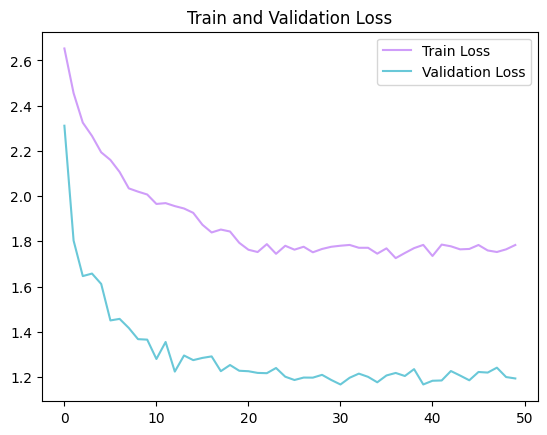

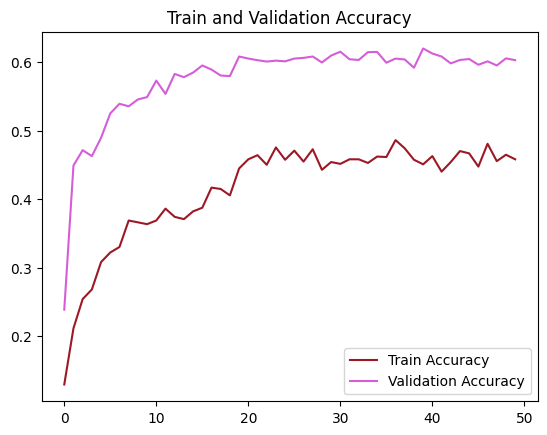

In [8]:
# read model 
preturbation1 = torch.load("models/preturbation1.pt")
# freeze gradients
preturbation1.model.features.requires_grad_(False)
# get new classifier sub network
classif = simple_classifier()
# set classifier
preturbation1.model.classifier = classif
# load original data
train_loader, validation_loader = load_15SceneData()
# save path
save_path = "models/preturbation1_classifier.pt"
# train 
train_loss_list, train_accuracy_list, val_loss_list, val_accuracy_list  =\
    train(preturbation1, train_loader, validation_loader, save_path, num_epochs=50, learning_rate=LR)

# plot loss
plot_loss(train_loss_list, val_loss_list)

# plot accuracy
plot_accuracy(train_accuracy_list, val_accuracy_list)

# save accuracy results
np.savetxt("results/accuracy_preturbation1_classifier.csv", 
           val_accuracy_list,
           delimiter =", ", 
           fmt ='% s')

### Model 2 (Preturbation1 with complex classifier and augmented dataloader)

100%|██████████| 94/94 [00:18<00:00,  5.15it/s]


Epoch 1/50: Train Loss: 2.7050, Train Acc: 0.0800, Val Loss: 2.5631, Val Acc: 0.1213


100%|██████████| 94/94 [00:18<00:00,  5.09it/s]


Epoch 2/50: Train Loss: 2.5597, Train Acc: 0.1547, Val Loss: 2.0257, Val Acc: 0.2988


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 3/50: Train Loss: 2.2985, Train Acc: 0.2067, Val Loss: 2.0489, Val Acc: 0.3045


100%|██████████| 94/94 [00:18<00:00,  5.10it/s]


Epoch 4/50: Train Loss: 2.2338, Train Acc: 0.2340, Val Loss: 1.6626, Val Acc: 0.3956


100%|██████████| 94/94 [00:18<00:00,  5.10it/s]


Epoch 5/50: Train Loss: 2.1420, Train Acc: 0.2507, Val Loss: 1.7277, Val Acc: 0.4171


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 6/50: Train Loss: 2.1001, Train Acc: 0.2860, Val Loss: 1.6859, Val Acc: 0.4265


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 7/50: Train Loss: 2.0463, Train Acc: 0.3047, Val Loss: 1.4621, Val Acc: 0.4864


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 8/50: Train Loss: 2.0713, Train Acc: 0.2847, Val Loss: 1.4884, Val Acc: 0.4553


100%|██████████| 94/94 [00:18<00:00,  5.09it/s]


Epoch 9/50: Train Loss: 2.0065, Train Acc: 0.3007, Val Loss: 1.5656, Val Acc: 0.4379


100%|██████████| 94/94 [00:18<00:00,  5.12it/s]


Epoch 10/50: Train Loss: 1.9679, Train Acc: 0.3107, Val Loss: 1.4405, Val Acc: 0.5035


100%|██████████| 94/94 [00:18<00:00,  5.10it/s]


Epoch 11/50: Train Loss: 1.9709, Train Acc: 0.3293, Val Loss: 1.3706, Val Acc: 0.5223


100%|██████████| 94/94 [00:18<00:00,  5.09it/s]


Epoch 12/50: Train Loss: 1.9071, Train Acc: 0.3500, Val Loss: 1.3868, Val Acc: 0.5069


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 13/50: Train Loss: 1.9162, Train Acc: 0.3413, Val Loss: 1.3172, Val Acc: 0.5420


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 14/50: Train Loss: 1.9062, Train Acc: 0.3420, Val Loss: 1.4732, Val Acc: 0.4754


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 15/50: Train Loss: 1.9401, Train Acc: 0.3587, Val Loss: 1.4267, Val Acc: 0.4774


100%|██████████| 94/94 [00:18<00:00,  5.12it/s]


Epoch 16/50: Train Loss: 1.8770, Train Acc: 0.3573, Val Loss: 1.3684, Val Acc: 0.5045


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 17/50: Train Loss: 1.7903, Train Acc: 0.3960, Val Loss: 1.2748, Val Acc: 0.5447


100%|██████████| 94/94 [00:18<00:00,  5.10it/s]


Epoch 18/50: Train Loss: 1.7500, Train Acc: 0.3973, Val Loss: 1.2174, Val Acc: 0.5628


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 19/50: Train Loss: 1.7556, Train Acc: 0.3953, Val Loss: 1.2153, Val Acc: 0.5645


100%|██████████| 94/94 [00:18<00:00,  5.10it/s]


Epoch 20/50: Train Loss: 1.7455, Train Acc: 0.3927, Val Loss: 1.2185, Val Acc: 0.5601


100%|██████████| 94/94 [00:18<00:00,  5.12it/s]


Epoch 21/50: Train Loss: 1.7392, Train Acc: 0.4133, Val Loss: 1.2116, Val Acc: 0.5621


100%|██████████| 94/94 [00:18<00:00,  5.13it/s]


Epoch 22/50: Train Loss: 1.7421, Train Acc: 0.3920, Val Loss: 1.1792, Val Acc: 0.5672


100%|██████████| 94/94 [00:18<00:00,  5.10it/s]


Epoch 23/50: Train Loss: 1.7379, Train Acc: 0.4180, Val Loss: 1.2305, Val Acc: 0.5518


100%|██████████| 94/94 [00:18<00:00,  5.12it/s]


Epoch 24/50: Train Loss: 1.7436, Train Acc: 0.4167, Val Loss: 1.2242, Val Acc: 0.5585


100%|██████████| 94/94 [00:18<00:00,  5.12it/s]


Epoch 25/50: Train Loss: 1.7245, Train Acc: 0.4153, Val Loss: 1.1627, Val Acc: 0.5822


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 26/50: Train Loss: 1.6966, Train Acc: 0.4360, Val Loss: 1.1852, Val Acc: 0.5642


100%|██████████| 94/94 [00:18<00:00,  5.08it/s]


Epoch 27/50: Train Loss: 1.7445, Train Acc: 0.4100, Val Loss: 1.1599, Val Acc: 0.5819


100%|██████████| 94/94 [00:18<00:00,  5.10it/s]


Epoch 28/50: Train Loss: 1.7113, Train Acc: 0.4300, Val Loss: 1.1457, Val Acc: 0.5849


100%|██████████| 94/94 [00:18<00:00,  5.10it/s]


Epoch 29/50: Train Loss: 1.6790, Train Acc: 0.4460, Val Loss: 1.1364, Val Acc: 0.5863


100%|██████████| 94/94 [00:18<00:00,  5.10it/s]


Epoch 30/50: Train Loss: 1.7103, Train Acc: 0.4173, Val Loss: 1.1657, Val Acc: 0.5739


100%|██████████| 94/94 [00:18<00:00,  5.12it/s]


Epoch 31/50: Train Loss: 1.7138, Train Acc: 0.4133, Val Loss: 1.1657, Val Acc: 0.5789


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 32/50: Train Loss: 1.6977, Train Acc: 0.4240, Val Loss: 1.1293, Val Acc: 0.5903


100%|██████████| 94/94 [00:18<00:00,  5.09it/s]


Epoch 33/50: Train Loss: 1.6422, Train Acc: 0.4413, Val Loss: 1.1517, Val Acc: 0.5873


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 34/50: Train Loss: 1.6591, Train Acc: 0.4220, Val Loss: 1.1619, Val Acc: 0.5836


100%|██████████| 94/94 [00:18<00:00,  5.08it/s]


Epoch 35/50: Train Loss: 1.6720, Train Acc: 0.4427, Val Loss: 1.1702, Val Acc: 0.5799


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 36/50: Train Loss: 1.6825, Train Acc: 0.4213, Val Loss: 1.1390, Val Acc: 0.5940


100%|██████████| 94/94 [00:18<00:00,  5.13it/s]


Epoch 37/50: Train Loss: 1.6821, Train Acc: 0.4127, Val Loss: 1.1433, Val Acc: 0.5903


100%|██████████| 94/94 [00:18<00:00,  5.17it/s]


Epoch 38/50: Train Loss: 1.6401, Train Acc: 0.4393, Val Loss: 1.1559, Val Acc: 0.5883


100%|██████████| 94/94 [00:18<00:00,  5.16it/s]


Epoch 39/50: Train Loss: 1.6659, Train Acc: 0.4353, Val Loss: 1.1463, Val Acc: 0.5839


100%|██████████| 94/94 [00:18<00:00,  5.16it/s]


Epoch 40/50: Train Loss: 1.6537, Train Acc: 0.4367, Val Loss: 1.1570, Val Acc: 0.5859


100%|██████████| 94/94 [00:18<00:00,  5.16it/s]


Epoch 41/50: Train Loss: 1.6396, Train Acc: 0.4500, Val Loss: 1.1658, Val Acc: 0.5876


100%|██████████| 94/94 [00:18<00:00,  5.16it/s]


Epoch 42/50: Train Loss: 1.6535, Train Acc: 0.4287, Val Loss: 1.1264, Val Acc: 0.5943


100%|██████████| 94/94 [00:18<00:00,  5.15it/s]


Epoch 43/50: Train Loss: 1.6649, Train Acc: 0.4427, Val Loss: 1.1599, Val Acc: 0.5846


100%|██████████| 94/94 [00:18<00:00,  5.16it/s]


Epoch 44/50: Train Loss: 1.6650, Train Acc: 0.4387, Val Loss: 1.1220, Val Acc: 0.5997


100%|██████████| 94/94 [00:18<00:00,  5.15it/s]


Epoch 45/50: Train Loss: 1.6541, Train Acc: 0.4353, Val Loss: 1.1383, Val Acc: 0.5943


100%|██████████| 94/94 [00:18<00:00,  5.16it/s]


Epoch 46/50: Train Loss: 1.6729, Train Acc: 0.4173, Val Loss: 1.1485, Val Acc: 0.5843


100%|██████████| 94/94 [00:18<00:00,  5.15it/s]


Epoch 47/50: Train Loss: 1.6445, Train Acc: 0.4367, Val Loss: 1.1506, Val Acc: 0.5822


100%|██████████| 94/94 [00:18<00:00,  5.15it/s]


Epoch 48/50: Train Loss: 1.7031, Train Acc: 0.4247, Val Loss: 1.1545, Val Acc: 0.5796


100%|██████████| 94/94 [00:18<00:00,  5.16it/s]


Epoch 49/50: Train Loss: 1.6893, Train Acc: 0.4200, Val Loss: 1.1677, Val Acc: 0.5796


100%|██████████| 94/94 [00:18<00:00,  5.15it/s]

Epoch 50/50: Train Loss: 1.6988, Train Acc: 0.4287, Val Loss: 1.1475, Val Acc: 0.5869


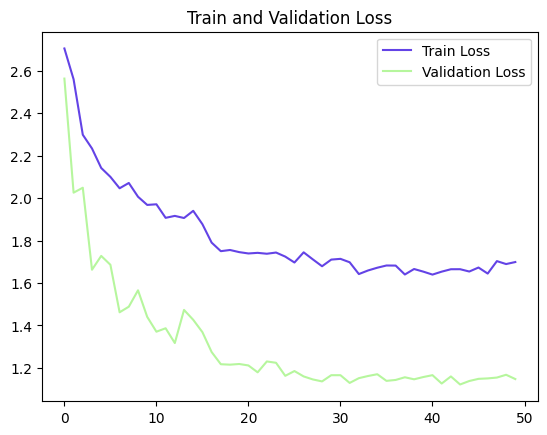

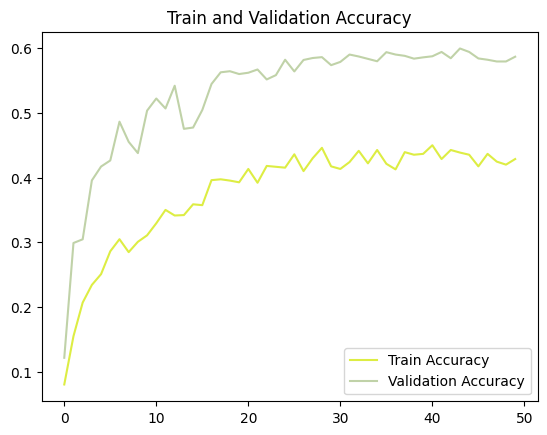

In [9]:
# read model 
preturbation1 = torch.load("models/preturbation1.pt")
# freeze gradients
preturbation1.model.features.requires_grad_(False)
# get new classifier sub network
classif= complex_classifier()
# set classifier
preturbation1.model.classifier = classif
# load original data
train_loader, validation_loader = load_15SceneData()
# save path
save_path = "models/preturbation2_classifier.pt"
# train 
train_loss_list, train_accuracy_list, val_loss_list, val_accuracy_list  =\
    train(preturbation1, train_loader, validation_loader, save_path, num_epochs=50, learning_rate=LR)

# plot loss
plot_loss(train_loss_list, val_loss_list)

# plot accuracy
plot_accuracy(train_accuracy_list, val_accuracy_list)

# save accuracy results
np.savetxt("results/accuracy_preturbation2_classifier.csv", 
           val_accuracy_list,
           delimiter =", ", 
           fmt ='% s')

### Model 3 (Preturbation1 with simple classifier and simple dataloader)

100%|██████████| 94/94 [00:18<00:00,  5.09it/s]


Epoch 1/50: Train Loss: 2.4898, Train Acc: 0.2027, Val Loss: 2.4342, Val Acc: 0.3089


100%|██████████| 94/94 [00:18<00:00,  5.15it/s]


Epoch 2/50: Train Loss: 2.0985, Train Acc: 0.3727, Val Loss: 1.8178, Val Acc: 0.4777


100%|██████████| 94/94 [00:18<00:00,  5.08it/s]


Epoch 3/50: Train Loss: 1.8704, Train Acc: 0.4493, Val Loss: 1.7422, Val Acc: 0.4576


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 4/50: Train Loss: 1.7485, Train Acc: 0.4813, Val Loss: 1.6369, Val Acc: 0.4901


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 5/50: Train Loss: 1.6325, Train Acc: 0.5173, Val Loss: 1.5581, Val Acc: 0.5136


100%|██████████| 94/94 [00:18<00:00,  5.17it/s]


Epoch 6/50: Train Loss: 1.5375, Train Acc: 0.5447, Val Loss: 1.4756, Val Acc: 0.5564


100%|██████████| 94/94 [00:18<00:00,  5.16it/s]


Epoch 7/50: Train Loss: 1.4879, Train Acc: 0.5633, Val Loss: 1.3940, Val Acc: 0.5712


100%|██████████| 94/94 [00:18<00:00,  5.00it/s]


Epoch 8/50: Train Loss: 1.4410, Train Acc: 0.5727, Val Loss: 1.3880, Val Acc: 0.5869


100%|██████████| 94/94 [00:18<00:00,  5.14it/s]


Epoch 9/50: Train Loss: 1.3856, Train Acc: 0.5800, Val Loss: 1.3930, Val Acc: 0.5812


100%|██████████| 94/94 [00:18<00:00,  5.05it/s]


Epoch 10/50: Train Loss: 1.3415, Train Acc: 0.5920, Val Loss: 1.3136, Val Acc: 0.5839


100%|██████████| 94/94 [00:18<00:00,  5.12it/s]


Epoch 11/50: Train Loss: 1.3372, Train Acc: 0.5940, Val Loss: 1.3122, Val Acc: 0.5936


100%|██████████| 94/94 [00:18<00:00,  5.12it/s]


Epoch 12/50: Train Loss: 1.2762, Train Acc: 0.6200, Val Loss: 1.2872, Val Acc: 0.5903


100%|██████████| 94/94 [00:18<00:00,  5.13it/s]


Epoch 13/50: Train Loss: 1.2455, Train Acc: 0.6227, Val Loss: 1.2124, Val Acc: 0.6369


100%|██████████| 94/94 [00:18<00:00,  5.14it/s]


Epoch 14/50: Train Loss: 1.1889, Train Acc: 0.6520, Val Loss: 1.2455, Val Acc: 0.6111


100%|██████████| 94/94 [00:18<00:00,  5.15it/s]


Epoch 15/50: Train Loss: 1.1778, Train Acc: 0.6660, Val Loss: 1.2448, Val Acc: 0.6080


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 16/50: Train Loss: 1.1778, Train Acc: 0.6473, Val Loss: 1.2016, Val Acc: 0.6338


100%|██████████| 94/94 [00:18<00:00,  5.15it/s]


Epoch 17/50: Train Loss: 1.1310, Train Acc: 0.6740, Val Loss: 1.1892, Val Acc: 0.6415


100%|██████████| 94/94 [00:18<00:00,  5.14it/s]


Epoch 18/50: Train Loss: 1.1020, Train Acc: 0.6833, Val Loss: 1.1985, Val Acc: 0.6379


100%|██████████| 94/94 [00:18<00:00,  5.15it/s]


Epoch 19/50: Train Loss: 1.0827, Train Acc: 0.7027, Val Loss: 1.1920, Val Acc: 0.6382


100%|██████████| 94/94 [00:18<00:00,  5.16it/s]


Epoch 20/50: Train Loss: 1.0938, Train Acc: 0.6893, Val Loss: 1.1703, Val Acc: 0.6432


100%|██████████| 94/94 [00:18<00:00,  5.13it/s]


Epoch 21/50: Train Loss: 1.0970, Train Acc: 0.6907, Val Loss: 1.1767, Val Acc: 0.6436


100%|██████████| 94/94 [00:18<00:00,  5.15it/s]


Epoch 22/50: Train Loss: 1.0996, Train Acc: 0.6953, Val Loss: 1.1950, Val Acc: 0.6389


100%|██████████| 94/94 [00:18<00:00,  5.15it/s]


Epoch 23/50: Train Loss: 1.1402, Train Acc: 0.6700, Val Loss: 1.1642, Val Acc: 0.6462


100%|██████████| 94/94 [00:18<00:00,  5.15it/s]


Epoch 24/50: Train Loss: 1.1098, Train Acc: 0.6887, Val Loss: 1.1753, Val Acc: 0.6439


100%|██████████| 94/94 [00:18<00:00,  5.13it/s]


Epoch 25/50: Train Loss: 1.0872, Train Acc: 0.6973, Val Loss: 1.1853, Val Acc: 0.6352


100%|██████████| 94/94 [00:18<00:00,  5.13it/s]


Epoch 26/50: Train Loss: 1.0977, Train Acc: 0.6880, Val Loss: 1.1563, Val Acc: 0.6472


100%|██████████| 94/94 [00:18<00:00,  5.13it/s]


Epoch 27/50: Train Loss: 1.0938, Train Acc: 0.6867, Val Loss: 1.1774, Val Acc: 0.6425


100%|██████████| 94/94 [00:18<00:00,  5.16it/s]


Epoch 28/50: Train Loss: 1.0630, Train Acc: 0.7067, Val Loss: 1.1548, Val Acc: 0.6499


100%|██████████| 94/94 [00:18<00:00,  5.14it/s]


Epoch 29/50: Train Loss: 1.0819, Train Acc: 0.6813, Val Loss: 1.1401, Val Acc: 0.6503


100%|██████████| 94/94 [00:18<00:00,  5.14it/s]


Epoch 30/50: Train Loss: 1.0492, Train Acc: 0.7160, Val Loss: 1.1845, Val Acc: 0.6362


100%|██████████| 94/94 [00:18<00:00,  5.13it/s]


Epoch 31/50: Train Loss: 1.0674, Train Acc: 0.7093, Val Loss: 1.1553, Val Acc: 0.6496


100%|██████████| 94/94 [00:18<00:00,  5.12it/s]


Epoch 32/50: Train Loss: 1.0916, Train Acc: 0.6980, Val Loss: 1.1777, Val Acc: 0.6379


100%|██████████| 94/94 [00:18<00:00,  5.14it/s]


Epoch 33/50: Train Loss: 1.0640, Train Acc: 0.6967, Val Loss: 1.1659, Val Acc: 0.6432


100%|██████████| 94/94 [00:18<00:00,  5.15it/s]


Epoch 34/50: Train Loss: 1.0988, Train Acc: 0.6867, Val Loss: 1.1500, Val Acc: 0.6446


100%|██████████| 94/94 [00:18<00:00,  5.21it/s]


Epoch 35/50: Train Loss: 1.0647, Train Acc: 0.7140, Val Loss: 1.1596, Val Acc: 0.6469


100%|██████████| 94/94 [00:18<00:00,  5.14it/s]


Epoch 36/50: Train Loss: 1.0931, Train Acc: 0.6827, Val Loss: 1.1377, Val Acc: 0.6539


100%|██████████| 94/94 [00:18<00:00,  5.15it/s]


Epoch 37/50: Train Loss: 1.0746, Train Acc: 0.7020, Val Loss: 1.1531, Val Acc: 0.6459


100%|██████████| 94/94 [00:18<00:00,  5.13it/s]


Epoch 38/50: Train Loss: 1.0883, Train Acc: 0.6933, Val Loss: 1.1525, Val Acc: 0.6466


100%|██████████| 94/94 [00:18<00:00,  5.14it/s]


Epoch 39/50: Train Loss: 1.0648, Train Acc: 0.6993, Val Loss: 1.1624, Val Acc: 0.6462


100%|██████████| 94/94 [00:18<00:00,  5.13it/s]


Epoch 40/50: Train Loss: 1.0915, Train Acc: 0.6940, Val Loss: 1.1600, Val Acc: 0.6482


100%|██████████| 94/94 [00:18<00:00,  5.13it/s]


Epoch 41/50: Train Loss: 1.0531, Train Acc: 0.7120, Val Loss: 1.1681, Val Acc: 0.6399


100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


Epoch 42/50: Train Loss: 1.0719, Train Acc: 0.6973, Val Loss: 1.1495, Val Acc: 0.6466


100%|██████████| 94/94 [00:18<00:00,  5.20it/s]


Epoch 43/50: Train Loss: 1.0781, Train Acc: 0.6973, Val Loss: 1.1590, Val Acc: 0.6432


100%|██████████| 94/94 [00:18<00:00,  5.21it/s]


Epoch 44/50: Train Loss: 1.1000, Train Acc: 0.6847, Val Loss: 1.1590, Val Acc: 0.6446


100%|██████████| 94/94 [00:18<00:00,  5.20it/s]


Epoch 45/50: Train Loss: 1.0869, Train Acc: 0.6887, Val Loss: 1.1475, Val Acc: 0.6456


100%|██████████| 94/94 [00:18<00:00,  5.20it/s]


Epoch 46/50: Train Loss: 1.0641, Train Acc: 0.6967, Val Loss: 1.1510, Val Acc: 0.6456


100%|██████████| 94/94 [00:18<00:00,  5.21it/s]


Epoch 47/50: Train Loss: 1.0853, Train Acc: 0.6987, Val Loss: 1.1522, Val Acc: 0.6472


100%|██████████| 94/94 [00:18<00:00,  5.21it/s]


Epoch 48/50: Train Loss: 1.0556, Train Acc: 0.6953, Val Loss: 1.1567, Val Acc: 0.6469


100%|██████████| 94/94 [00:18<00:00,  5.21it/s]


Epoch 49/50: Train Loss: 1.0627, Train Acc: 0.7127, Val Loss: 1.1605, Val Acc: 0.6486


100%|██████████| 94/94 [00:18<00:00,  5.22it/s]

Epoch 50/50: Train Loss: 1.0849, Train Acc: 0.7040, Val Loss: 1.1608, Val Acc: 0.6456


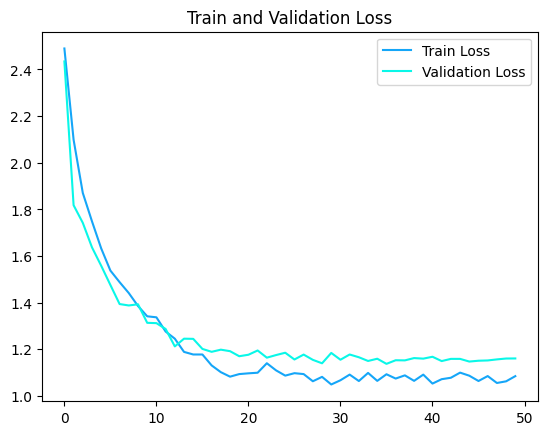

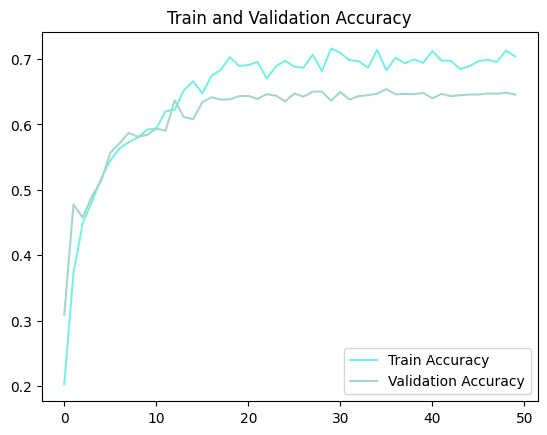

In [4]:
# read model 
preturbation1 = torch.load("models/preturbation1.pt")
# freeze gradients
preturbation1.model.features.requires_grad_(False)
# get new classifier sub network
classif= simple_classifier()
# set classifier
preturbation1.model.classifier = classif
# load original data
train_loader, validation_loader = simple_15SceneData()
# save path
save_path = "models/preturbation3_classifier.pt"
# train 
train_loss_list, train_accuracy_list, val_loss_list, val_accuracy_list  =\
    train(preturbation1, train_loader, validation_loader, save_path, num_epochs=50, learning_rate=LR)

# plot loss
plot_loss(train_loss_list, val_loss_list)

# plot accuracy
plot_accuracy(train_accuracy_list, val_accuracy_list)

# save accuracy results
np.savetxt("results/accuracy_preturbation3_classifier.csv", 
           val_accuracy_list,
           delimiter =", ", 
           fmt ='% s')

### Comparison

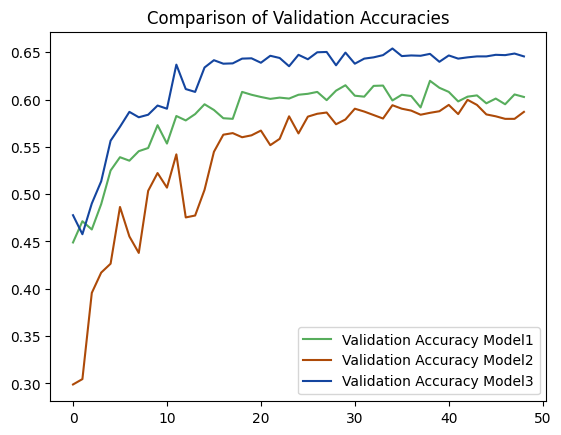

In [16]:
val_accuracy_model1 = np.array(pd.read_csv("results/accuracy_preturbation1_classifier.csv"))
val_accuracy_model2 = np.array(pd.read_csv("results/accuracy_preturbation2_classifier.csv"))
val_accuracy_model3 = np.array(pd.read_csv("results/accuracy_preturbation3_classifier.csv"))

color = (np.random.random(),np.random.random(),np.random.random())
plt.plot(np.arange(len(val_accuracy_model1)), val_accuracy_model1, color=color, label='Validation Accuracy Model1')

color = (np.random.random(),np.random.random(),np.random.random())
plt.plot(np.arange(len(val_accuracy_model2)), val_accuracy_model2,color=color,label='Validation Accuracy Model2')

color = (np.random.random(),np.random.random(),np.random.random())
plt.plot(np.arange(len(val_accuracy_model3)), val_accuracy_model3,color=color,label='Validation Accuracy Model3')

plt.legend()
plt.title('Comparison of Validation Accuracies')
plt.show()

### Confusion matrices

100%|██████████| 94/94 [00:18<00:00,  4.95it/s]


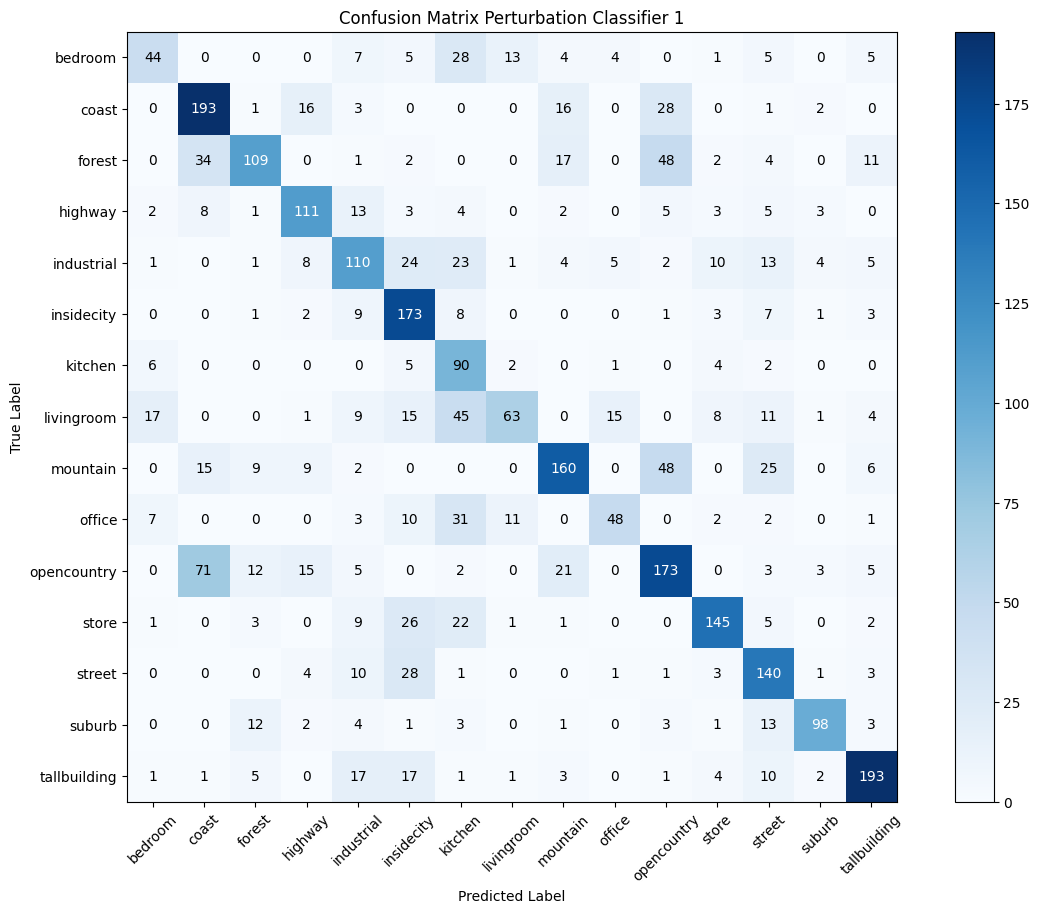

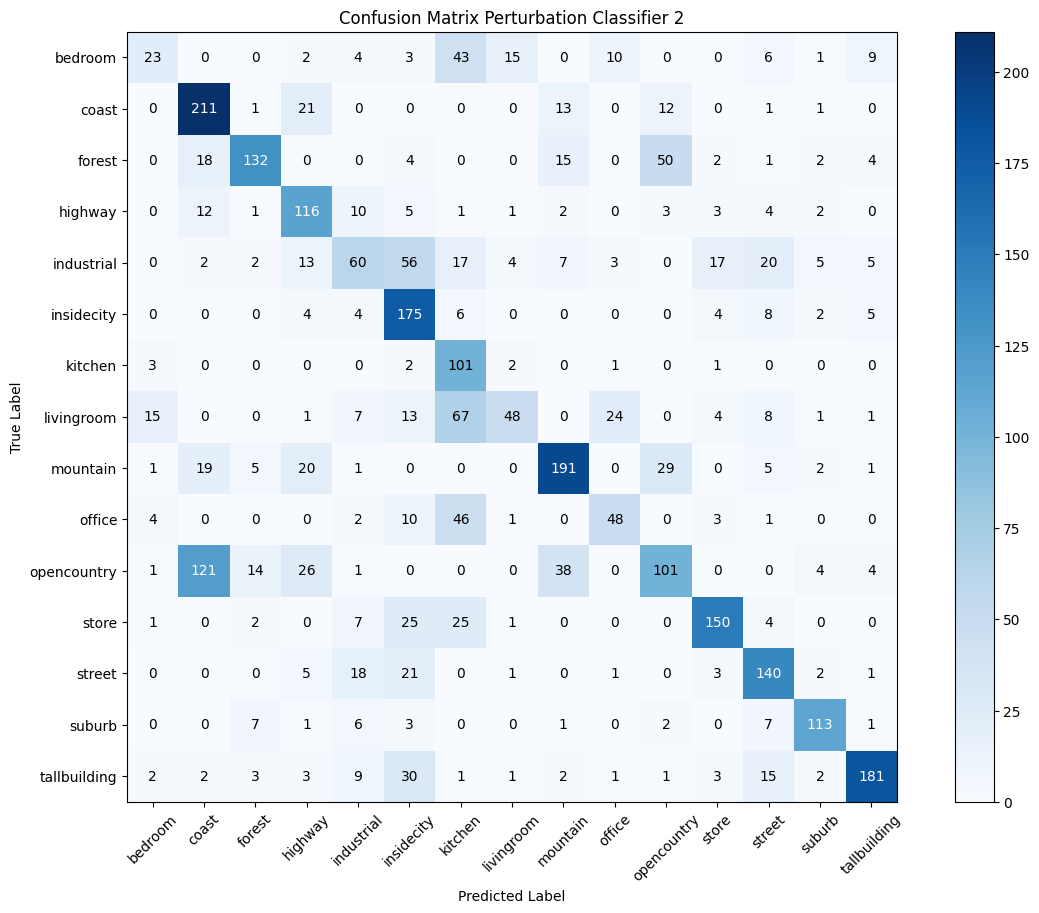

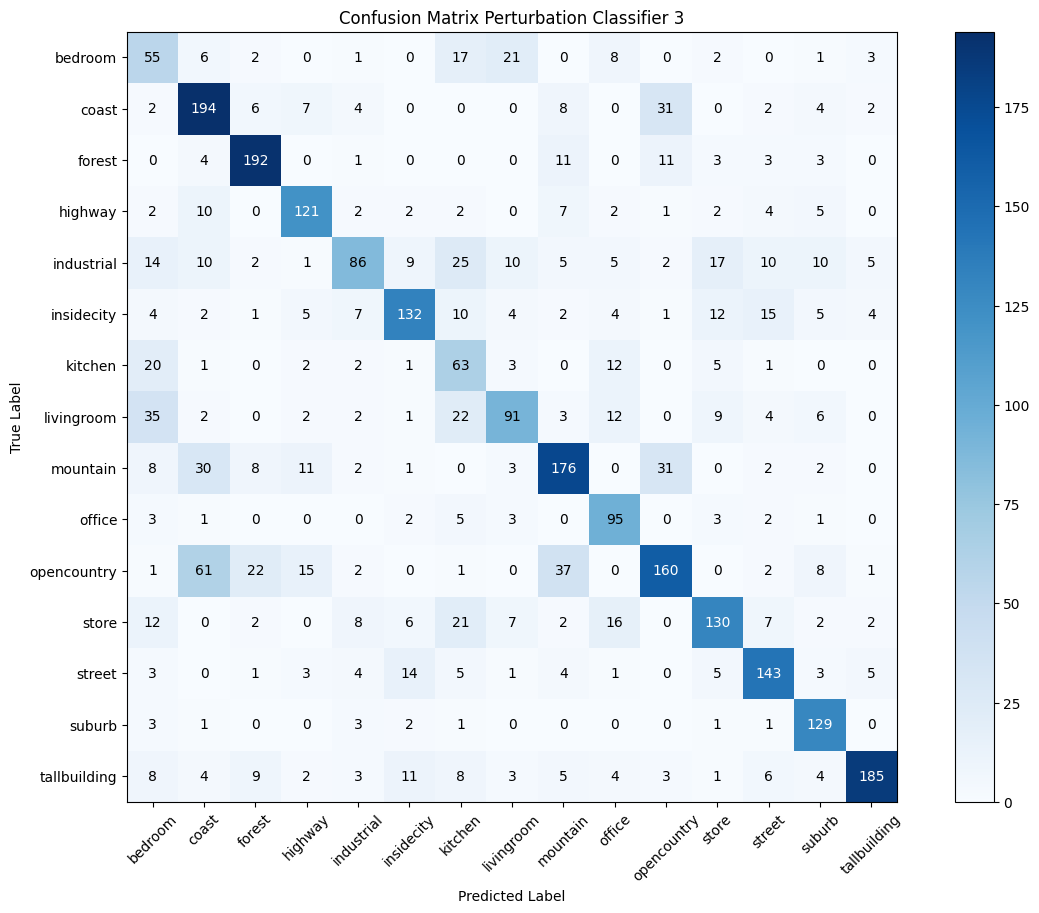

In [26]:
trainset = datasets.ImageFolder('data/train', transform=transforms.ToTensor())
classes = trainset.classes

train_loader, validation_loader = load_15SceneData()
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

model1 = torch.load("models/preturbation1_classifier.pt")
model1.to(device)

model2 = torch.load("models/preturbation2_classifier.pt")
model2.to(device)

model3 = torch.load("models/preturbation3_classifier.pt")
model3.to(device)

plot_confusion(model1, validation_loader, device, speaker_labels=classes, title="Confusion Matrix Perturbation Classifier 1")
plot_confusion(model2, validation_loader, device, speaker_labels=classes, title="Confusion Matrix Perturbation Classifier 2")
plot_confusion(model3, validation_loader, device, speaker_labels=classes, title="Confusion Matrix Perturbation Classifier 3")